In [1]:
!pip install pandas numpy matplotlib scikit-learn codecarbon Eco2AI CarbonTracker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.6/516.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.5.0
    Uninstalling termcolor-2.5.0:
      Successfully uninstalled termcolor-2.5.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from codecarbon import EmissionsTracker
from eco2ai import track

In [3]:
# Fetching data
file_path = "default of credit card clients.csv"
data = pd.read_csv(file_path)

In [4]:
data.sample()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2135,2136,250000,1,2,2,27,0,0,0,0,...,20492,18812,17663,2027,2000,1007,1031,2000,10000,0


In [5]:
data.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
print('Number of missing values per column')
for colm in data.columns:
  n_mv=data[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
ID: 0
LIMIT_BAL: 0
SEX: 0
EDUCATION: 0
MARRIAGE: 0
AGE: 0
PAY_0: 0
PAY_2: 0
PAY_3: 0
PAY_4: 0
PAY_5: 0
PAY_6: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0
default payment next month: 0


In [7]:
data.skew()

,0
ID,0.000000
LIMIT_BAL,0.992867
SEX,-0.424183
EDUCATION,0.970972
MARRIAGE,-0.018742
AGE,0.732246
PAY_0,0.731975
PAY_2,0.790565
PAY_3,0.840682
PAY_4,0.999629


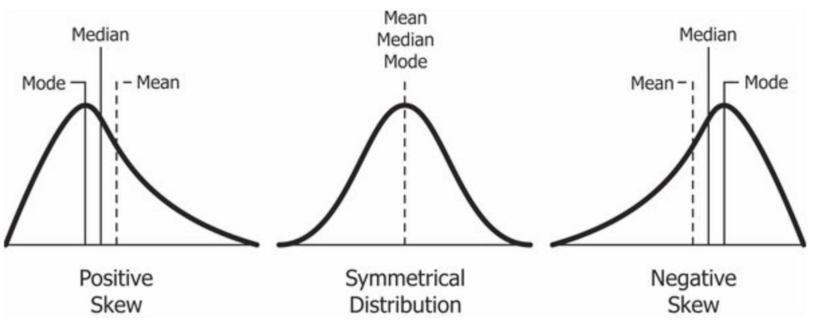

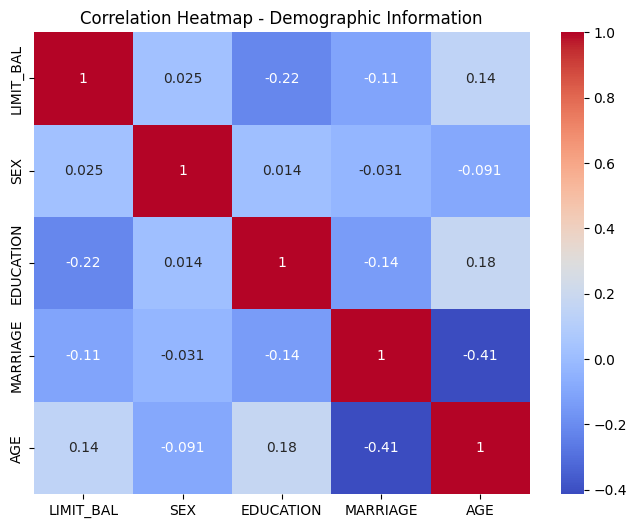

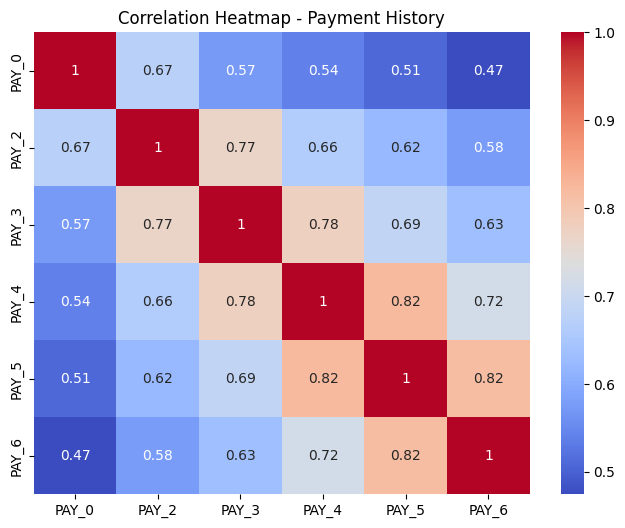

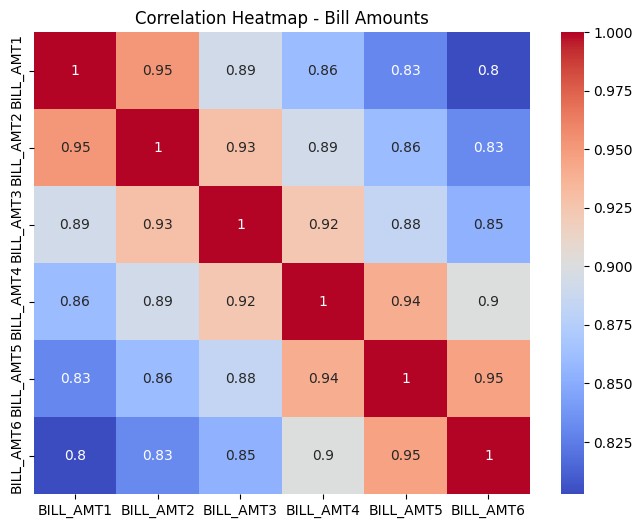

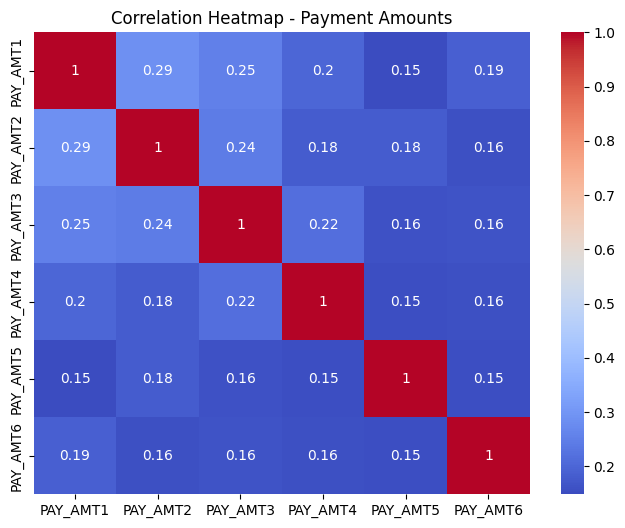

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Demographic Information
plt.figure(figsize=(8, 6))
sns.heatmap(data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Demographic Information')
plt.show()

# Payment History
plt.figure(figsize=(8, 6))
sns.heatmap(data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Payment History')
plt.show()

# Bill Amounts
plt.figure(figsize=(8, 6))
sns.heatmap(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Bill Amounts')
plt.show()

# Payment Amounts
plt.figure(figsize=(8, 6))
sns.heatmap(data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Payment Amounts')
plt.show()


In [9]:
data = pd.read_csv(file_path)

In [10]:
# Split the features columns and the target column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  #Target Column


In [11]:
# Devide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
#Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Transforming categotical data into the numerical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

In [14]:
# Function to train model and track emissions
def train_and_track(model, X_train, y_train):
    model.fit(X_train, y_train)


In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# RandomForest Configurations
random_forest_configs = {
    "RandomForest_1": {
        "model": RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42),
        "hyperparameters": {"n_estimators": 100, "max_depth": None, "min_samples_split": 2}
    },
    "RandomForest_2": {
        "model": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=4, random_state=42),
        "hyperparameters": {"n_estimators": 200, "max_depth": 10, "min_samples_split": 4}
    },
    "RandomForest_3": {
        "model": RandomForestClassifier(n_estimators=150, max_depth=None, random_state=42),
        "hyperparameters": {"n_estimators": 150, "max_depth": 5, "min_samples_leaf": 2}
    }
}

# SVM Configurations
svm_configs = {
    "SVM_1": {
        "model": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
        "hyperparameters": {"kernel": 'rbf', "C": 1.0, "gamma": 'scale'}
    },
    "SVM_2": {
        "model": SVC(kernel='linear', C=0.5, gamma='auto', random_state=42),
        "hyperparameters": {"kernel": 'linear', "C": 0.5, "gamma": 'auto'}
    },
    "SVM_3": {
        "model": SVC(kernel='poly', C=2.0, degree=3, gamma='scale', random_state=42),
        "hyperparameters": {"kernel": 'poly', "C": 2.0, "degree": 3, "gamma": 'scale'}
    }
}

# Logistic Regression Configurations
logistic_regression_configs = {
    "LogisticRegression_1": {
        "model": LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42),
        "hyperparameters": {"penalty": 'l2', "C": 1.0, "max_iter": 1000}
    },
    "LogisticRegression_2": {
        "model": LogisticRegression(penalty='l1', solver='liblinear', C=0.5, random_state=42),
        "hyperparameters": {"penalty": 'l1', "solver": 'liblinear', "C": 0.5}
    },
    "LogisticRegression_3": {
        "model": LogisticRegression(penalty='l2', max_iter=2000, random_state=42),
        "hyperparameters": {"penalty": 'none', "max_iter": 2000}
    }
}

# Neural Network Configurations
neural_network_configs = {
    "NeuralNetwork_1": {
        "model": MLPClassifier(hidden_layer_sizes=(64,), activation='relu', max_iter=500, solver='adam', random_state=42),
        "hyperparameters": {"hidden_layer_sizes": (64,), "activation": 'relu', "max_iter": 500, "solver": 'adam'}
    },
    "NeuralNetwork_2": {
        "model": MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh', max_iter=1000, solver='sgd', random_state=42),
        "hyperparameters": {"hidden_layer_sizes": (128, 64), "activation": 'tanh', "max_iter": 1000, "solver": 'sgd'}
    },
    "NeuralNetwork_3": {
        "model": MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', batch_size=32, solver='adam', random_state=42),
        "hyperparameters": {"hidden_layer_sizes": (256, 128, 64), "activation": 'relu', "batch_size": 32, "solver": 'adam'}
    }
}

# GradientBoosting Configurations
gradient_boosting_configs = {
    "GradientBoosting_1": {
        "model": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        "hyperparameters": {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3}
    },
    "GradientBoosting_2": {
        "model": GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42),
        "hyperparameters": {"n_estimators": 150, "learning_rate": 0.05, "max_depth": 5}
    },
    "GradientBoosting_3": {
        "model": GradientBoostingClassifier(n_estimators=50, learning_rate=0.2, max_depth=2, random_state=42),
        "hyperparameters": {"n_estimators": 50, "learning_rate": 0.2, "max_depth": 2}
    }
}


[codecarbon INFO @ 17:47:08] [setup] RAM Tracking...
[codecarbon INFO @ 17:47:08] [setup] CPU Tracking...
[codecarbon WARNING @ 17:47:08] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 17:47:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:47:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:09] [setup] GPU Tracking...
[codecarbon INFO @ 17:47:09] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:47:09] >>> Tracker's metadata:
[codecarbon INFO @ 17:47:09]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:47:09]   Python version: 3.10.12
[codecarbon INFO @ 17:47:09]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:47:09]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:47:09]   CPU count: 2
[codeca


Model: RandomForest_1 (RandomForest)
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



[codecarbon WARNING @ 17:47:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:47:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:27] [setup] GPU Tracking...
[codecarbon INFO @ 17:47:27] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:47:27] >>> Tracker's metadata:
[codecarbon INFO @ 17:47:27]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:47:27]   Python version: 3.10.12
[codecarbon INFO @ 17:47:27]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:47:27]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:47:27]   CPU count: 2
[codecarbon INFO @ 17:47:27]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:27]   GPU count: 1
[codecarbon INFO @ 17:47:27]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:47:27] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:47:36] Energy consumed for RAM : 0


Model: RandomForest_2 (RandomForest)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



[codecarbon WARNING @ 17:47:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:47:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:37] [setup] GPU Tracking...
[codecarbon INFO @ 17:47:37] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:47:37] >>> Tracker's metadata:
[codecarbon INFO @ 17:47:37]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:47:37]   Python version: 3.10.12
[codecarbon INFO @ 17:47:37]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:47:37]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:47:37]   CPU count: 2
[codecarbon INFO @ 17:47:37]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:37]   GPU count: 1
[codecarbon INFO @ 17:47:37]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:47:37] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:47:48] Energy consumed for RAM : 0


Model: RandomForest_3 (RandomForest)
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



[codecarbon WARNING @ 17:47:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:47:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:50] [setup] GPU Tracking...
[codecarbon INFO @ 17:47:50] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:47:50] >>> Tracker's metadata:
[codecarbon INFO @ 17:47:50]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:47:50]   Python version: 3.10.12
[codecarbon INFO @ 17:47:50]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:47:50]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:47:50]   CPU count: 2
[codecarbon INFO @ 17:47:50]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:47:50]   GPU count: 1
[codecarbon INFO @ 17:47:50]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:47:50] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:48:05] Energy consumed for RAM : 0


Model: SVM_1 (SVM)
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.67      0.33      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



[codecarbon WARNING @ 17:48:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:48:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:48:15] [setup] GPU Tracking...
[codecarbon INFO @ 17:48:15] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:48:15] >>> Tracker's metadata:
[codecarbon INFO @ 17:48:15]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:48:15]   Python version: 3.10.12
[codecarbon INFO @ 17:48:15]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:48:15]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:48:15]   CPU count: 2
[codecarbon INFO @ 17:48:15]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:48:15]   GPU count: 1
[codecarbon INFO @ 17:48:15]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:48:15] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:48:30] Energy consumed for RAM : 0


Model: SVM_2 (SVM)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.69      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.61      9000
weighted avg       0.79      0.81      0.77      9000



[codecarbon WARNING @ 17:48:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:48:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:48:42] [setup] GPU Tracking...
[codecarbon INFO @ 17:48:42] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:48:42] >>> Tracker's metadata:
[codecarbon INFO @ 17:48:42]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:48:42]   Python version: 3.10.12
[codecarbon INFO @ 17:48:42]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:48:42]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:48:42]   CPU count: 2
[codecarbon INFO @ 17:48:42]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:48:42]   GPU count: 1
[codecarbon INFO @ 17:48:42]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:48:42] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:48:57] Energy consumed for RAM : 0


Model: SVM_3 (SVM)
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      7040
           1       0.64      0.25      0.36      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.61      0.62      9000
weighted avg       0.78      0.81      0.77      9000



[codecarbon WARNING @ 17:49:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:49:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:22] [setup] GPU Tracking...
[codecarbon INFO @ 17:49:22] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:49:22] >>> Tracker's metadata:
[codecarbon INFO @ 17:49:22]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:49:22]   Python version: 3.10.12
[codecarbon INFO @ 17:49:22]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:49:22]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:49:22]   CPU count: 2
[codecarbon INFO @ 17:49:22]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:22]   GPU count: 1
[codecarbon INFO @ 17:49:22]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:49:22] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:49:22] Energy consumed for RAM : 0


Model: LogisticRegression_1 (LogisticRegression)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



[codecarbon WARNING @ 17:49:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:49:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:24] [setup] GPU Tracking...
[codecarbon INFO @ 17:49:24] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:49:24] >>> Tracker's metadata:
[codecarbon INFO @ 17:49:24]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:49:24]   Python version: 3.10.12
[codecarbon INFO @ 17:49:24]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:49:24]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:49:24]   CPU count: 2
[codecarbon INFO @ 17:49:24]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:24]   GPU count: 1
[codecarbon INFO @ 17:49:24]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:49:24] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:49:24] Energy consumed for RAM : 0


Model: LogisticRegression_2 (LogisticRegression)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.34      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



[codecarbon WARNING @ 17:49:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:49:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:25] [setup] GPU Tracking...
[codecarbon INFO @ 17:49:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:49:25] >>> Tracker's metadata:
[codecarbon INFO @ 17:49:25]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:49:25]   Python version: 3.10.12
[codecarbon INFO @ 17:49:25]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:49:25]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:49:25]   CPU count: 2
[codecarbon INFO @ 17:49:25]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:25]   GPU count: 1
[codecarbon INFO @ 17:49:25]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:49:25] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:49:26] Energy consumed for RAM : 0


Model: LogisticRegression_3 (LogisticRegression)
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.68      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



[codecarbon WARNING @ 17:49:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:49:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:27] [setup] GPU Tracking...
[codecarbon INFO @ 17:49:27] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:49:27] >>> Tracker's metadata:
[codecarbon INFO @ 17:49:27]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:49:27]   Python version: 3.10.12
[codecarbon INFO @ 17:49:27]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:49:27]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:49:27]   CPU count: 2
[codecarbon INFO @ 17:49:27]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:27]   GPU count: 1
[codecarbon INFO @ 17:49:27]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:49:27] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:49:42] Energy consumed for RAM : 0


Model: NeuralNetwork_1 (NeuralNetwork)
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.35      0.44      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.64      0.67      9000
weighted avg       0.79      0.81      0.79      9000



[codecarbon WARNING @ 17:49:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:49:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:54] [setup] GPU Tracking...
[codecarbon INFO @ 17:49:54] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:49:54] >>> Tracker's metadata:
[codecarbon INFO @ 17:49:54]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:49:54]   Python version: 3.10.12
[codecarbon INFO @ 17:49:54]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:49:54]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:49:54]   CPU count: 2
[codecarbon INFO @ 17:49:54]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:49:54]   GPU count: 1
[codecarbon INFO @ 17:49:54]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:49:54] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:50:09] Energy consumed for RAM : 0


Model: NeuralNetwork_2 (NeuralNetwork)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



[codecarbon WARNING @ 17:51:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:51:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:51:58] [setup] GPU Tracking...
[codecarbon INFO @ 17:51:58] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:51:58] >>> Tracker's metadata:
[codecarbon INFO @ 17:51:58]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:51:58]   Python version: 3.10.12
[codecarbon INFO @ 17:51:58]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:51:58]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:51:58]   CPU count: 2
[codecarbon INFO @ 17:51:58]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:51:58]   GPU count: 1
[codecarbon INFO @ 17:51:58]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:51:58] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:52:13] Energy consumed for RAM : 0


Model: NeuralNetwork_3 (NeuralNetwork)
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7040
           1       0.42      0.40      0.41      1960

    accuracy                           0.75      9000
   macro avg       0.63      0.62      0.62      9000
weighted avg       0.74      0.75      0.75      9000



[codecarbon WARNING @ 17:59:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:59:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:06] [setup] GPU Tracking...
[codecarbon INFO @ 17:59:06] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:59:06] >>> Tracker's metadata:
[codecarbon INFO @ 17:59:06]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:59:06]   Python version: 3.10.12
[codecarbon INFO @ 17:59:06]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:59:06]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:59:06]   CPU count: 2
[codecarbon INFO @ 17:59:06]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:06]   GPU count: 1
[codecarbon INFO @ 17:59:06]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:59:07] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:59:17] Energy consumed for RAM : 0


Model: GradientBoosting_1 (GradientBoosting)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



[codecarbon WARNING @ 17:59:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:59:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:18] [setup] GPU Tracking...
[codecarbon INFO @ 17:59:18] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:59:18] >>> Tracker's metadata:
[codecarbon INFO @ 17:59:18]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:59:18]   Python version: 3.10.12
[codecarbon INFO @ 17:59:18]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:59:18]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:59:18]   CPU count: 2
[codecarbon INFO @ 17:59:18]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:18]   GPU count: 1
[codecarbon INFO @ 17:59:18]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:59:18] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:59:33] Energy consumed for RAM : 0


Model: GradientBoosting_2 (GradientBoosting)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



[codecarbon WARNING @ 17:59:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:59:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:46] [setup] GPU Tracking...
[codecarbon INFO @ 17:59:46] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:59:46] >>> Tracker's metadata:
[codecarbon INFO @ 17:59:46]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:59:46]   Python version: 3.10.12
[codecarbon INFO @ 17:59:46]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 17:59:46]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:59:46]   CPU count: 2
[codecarbon INFO @ 17:59:46]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 17:59:46]   GPU count: 1
[codecarbon INFO @ 17:59:46]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 17:59:46] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 17:59:49] Energy consumed for RAM : 0


Model: GradientBoosting_3 (GradientBoosting)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



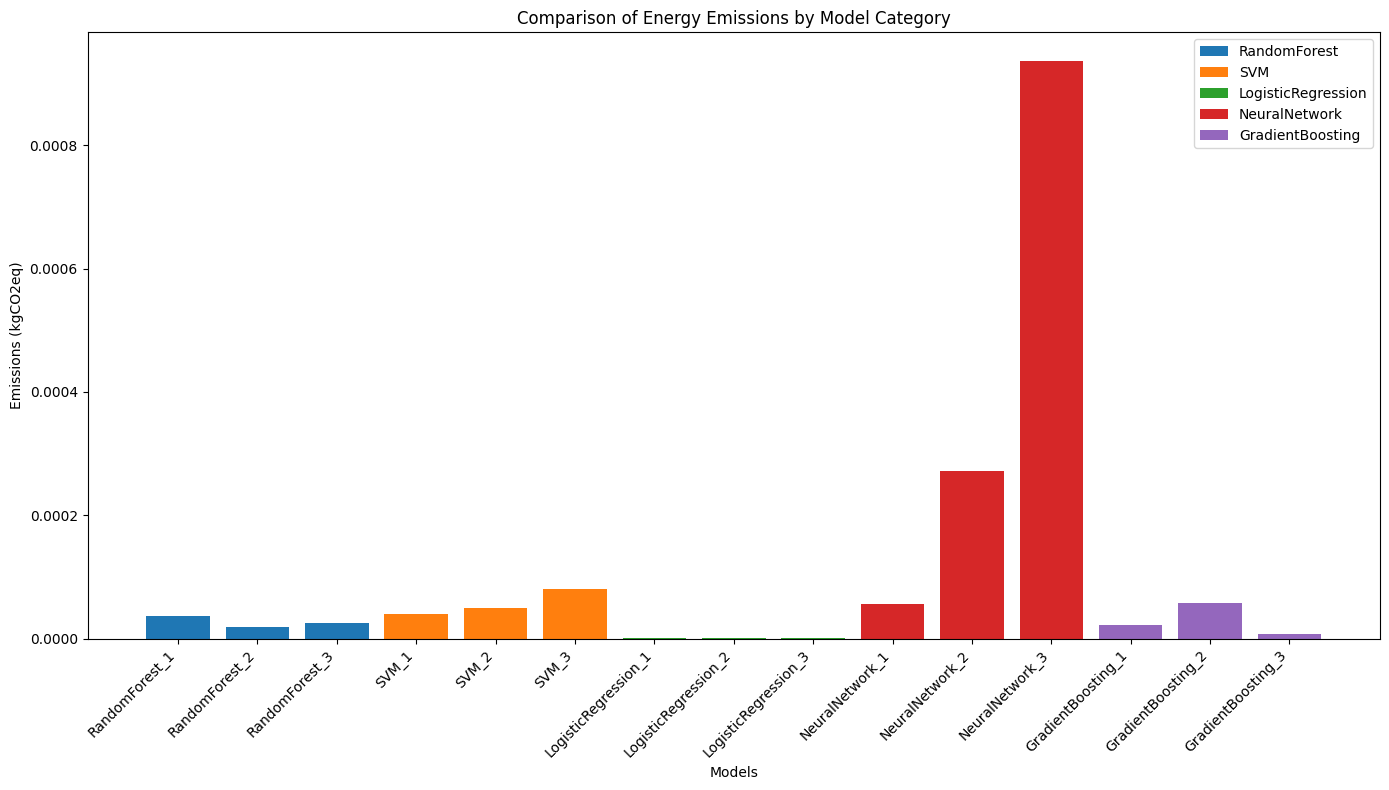

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from codecarbon import EmissionsTracker

# Grouping models by category
categories = {
    "RandomForest": random_forest_configs,
    "SVM": svm_configs,
    "LogisticRegression": logistic_regression_configs,
    "NeuralNetwork": neural_network_configs,
    "GradientBoosting": gradient_boosting_configs,
}

# Dictionary to hold results for each category
category_results = {category: [] for category in categories}

# Train and track emissions
for category, models in categories.items():
    for model_name, model_info in models.items():
        tracker = EmissionsTracker(project_name=model_name)
        tracker.start()

        # Train the model
        model = model_info["model"]
        model.fit(X_train, y_train)
        emissions = tracker.stop()


        # Evaluate the model
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        emissions_data = pd.read_csv("emissions.csv")
        latest_emission = emissions_data.iloc[-1]  # Get the latest record

        # Extract power consumption metrics
        cpu_energy = latest_emission["cpu_energy"]
        gpu_energy = latest_emission["gpu_energy"]
        ram_energy = latest_emission["ram_energy"]
        energy_consumed = latest_emission["energy_consumed"]
        emissions = latest_emission["emissions"]
        # Store the results
        category_results[category].append({
            "Model": model_name,
            "Hyperparameters": str(model_info["hyperparameters"]),
            "Accuracy": acc,
            "Emissions (kgCO2eq)": emissions,
            "CPU Energy (W)": cpu_energy,
            "GPU Energy (W)": gpu_energy,
            "RAM Energy (W)": ram_energy,
            "Consumed Energy (W)": energy_consumed
        })

        print(f"\nModel: {model_name} ({category})")
        print(classification_report(y_test, y_pred))

# Save results for each category to separate CSV files
for category, results in category_results.items():
    results_df = pd.DataFrame(results)
    results_df.to_csv(f"{category}_results.csv", index=False)

# Prepare data for visualization
plot_data = []
for category, results in category_results.items():
    for result in results:
        plot_data.append({
            "Category": category,
            "Model": result["Model"],
            "Emissions (kgCO2eq)": result["Emissions (kgCO2eq)"]
        })

plot_df = pd.DataFrame(plot_data)

# Plot emissions by category
plt.figure(figsize=(14, 8))
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.bar(
        category_data["Model"],
        category_data["Emissions (kgCO2eq)"],
        label=category
    )

plt.xlabel("Models")
plt.ylabel("Emissions (kgCO2eq)")
plt.title("Comparison of Energy Emissions by Model Category")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


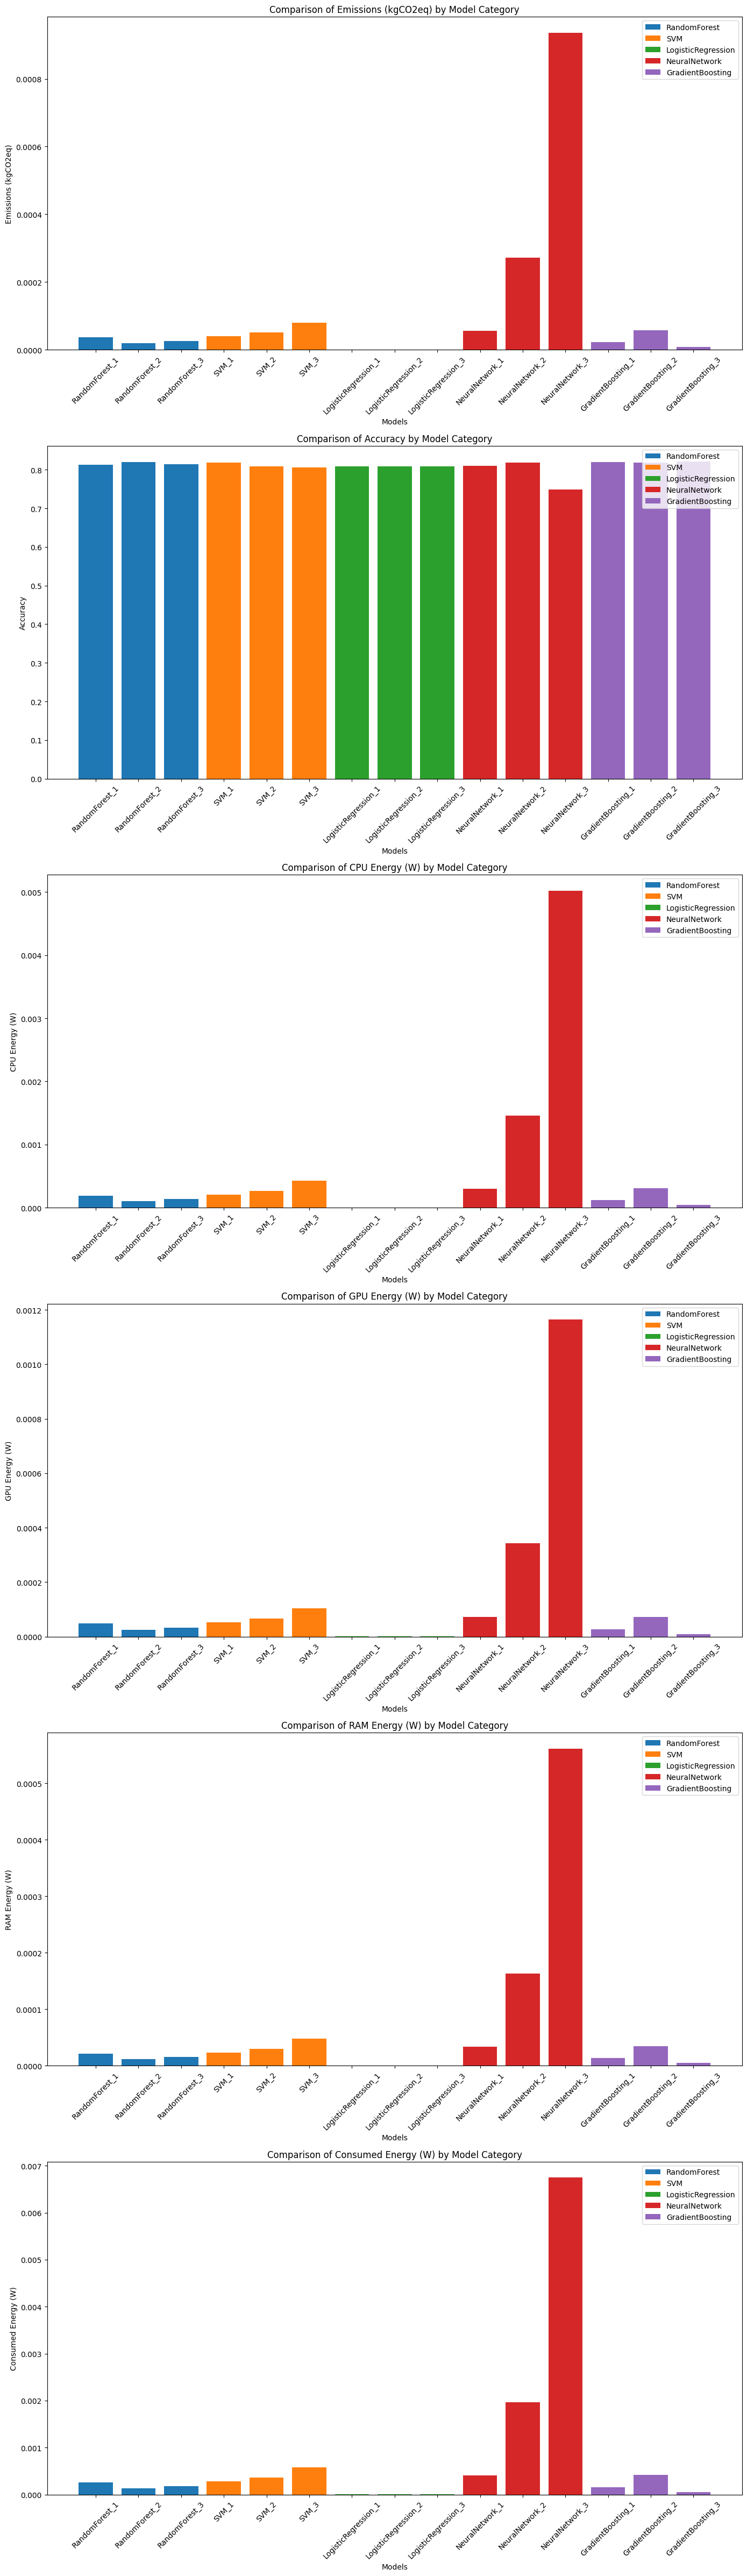

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
metrics = [
    "Emissions (kgCO2eq)",
    "Accuracy",
    "CPU Energy (W)",
    "GPU Energy (W)",
    "RAM Energy (W)",
    "Consumed Energy (W)"
]

# Convert category_results to a DataFrame
plot_data = []
for category, results in category_results.items():
    for result in results:
        plot_data.append({
            "Category": category,
            "Model": result["Model"],
            "Emissions (kgCO2eq)": result.get("Emissions (kgCO2eq)", 0),
            "Accuracy": result.get("Accuracy", 0),
            "CPU Energy (W)": result.get("CPU Energy (W)", 0),
            "GPU Energy (W)": result.get("GPU Energy (W)", 0),
            "RAM Energy (W)": result.get("RAM Energy (W)", 0),
            "Consumed Energy (W)": result.get("Consumed Energy (W)", 0),
        })

plot_df = pd.DataFrame(plot_data)

# Create subplots
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 8 * len(metrics)))

# If only one subplot, axes is a single object, so convert to a list
if len(metrics) == 1:
    axes = [axes]

# Plot each metric in its own subplot
for i, metric in enumerate(metrics):
    ax = axes[i]
    for category in plot_df["Category"].unique():
        category_data = plot_df[plot_df["Category"] == category]
        ax.bar(
            category_data["Model"],
            category_data[metric],
            label=category
        )

    ax.set_xlabel("Models")
    ax.set_ylabel(metric)
    ax.set_title(f"Comparison of {metric} by Model Category")
    ax.legend()
    ax.tick_params(axis="x", rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [18]:
# Replace None with 0 in relevant columns
plot_df["Emissions (kgCO2eq)"] = plot_df["Emissions (kgCO2eq)"].fillna(0)
plot_df["Accuracy"] = plot_df["Accuracy"].fillna(0)
plot_df["CPU Energy (W)"] = plot_df["CPU Energy (W)"].fillna(0)
plot_df["GPU Energy (W)"] = plot_df["GPU Energy (W)"].fillna(0)
plot_df["RAM Energy (W)"] = plot_df["RAM Energy (W)"].fillna(0)
plot_df["Consumed Energy (W)"] = plot_df["Consumed Energy (W)"].fillna(0)

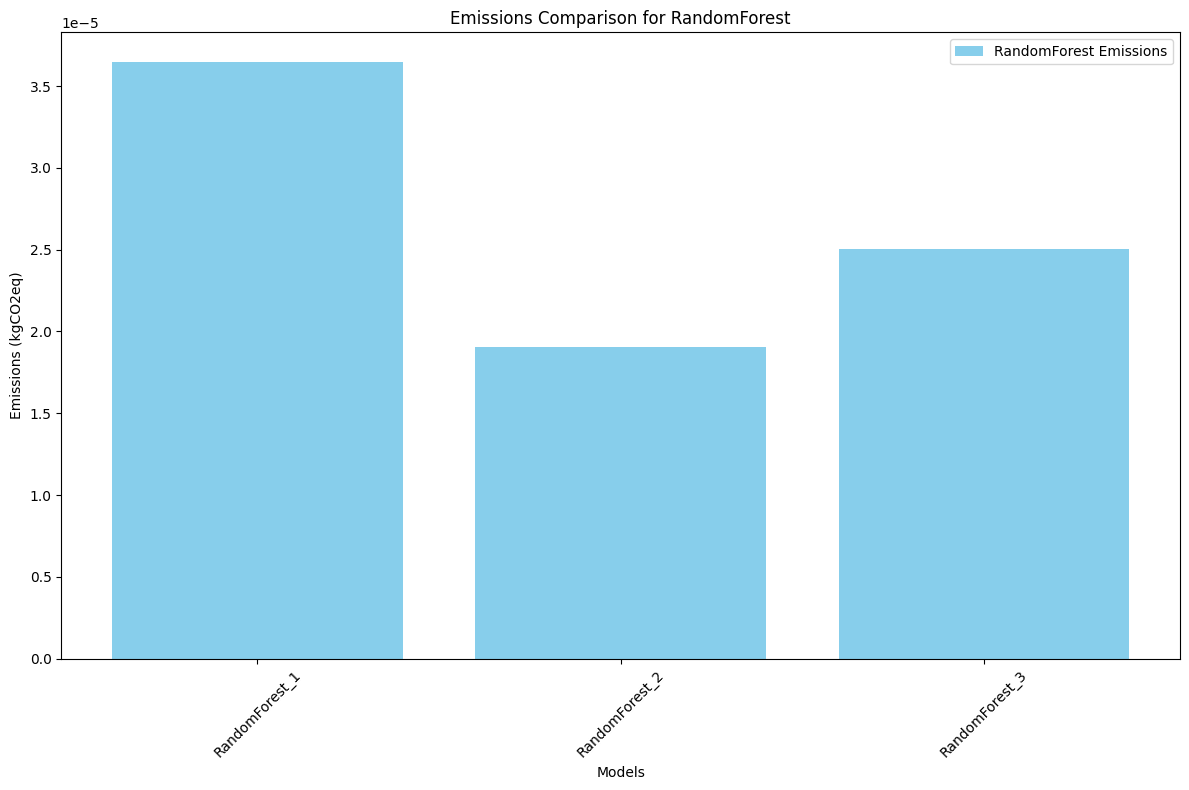

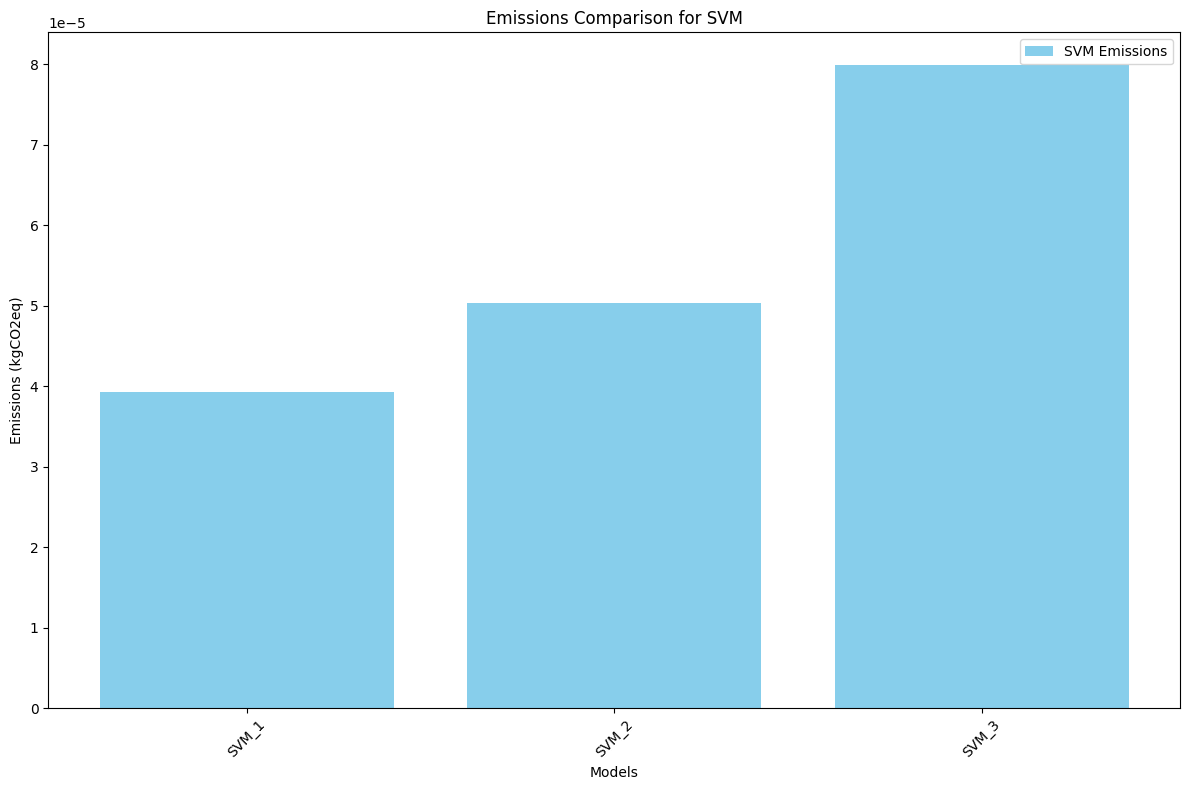

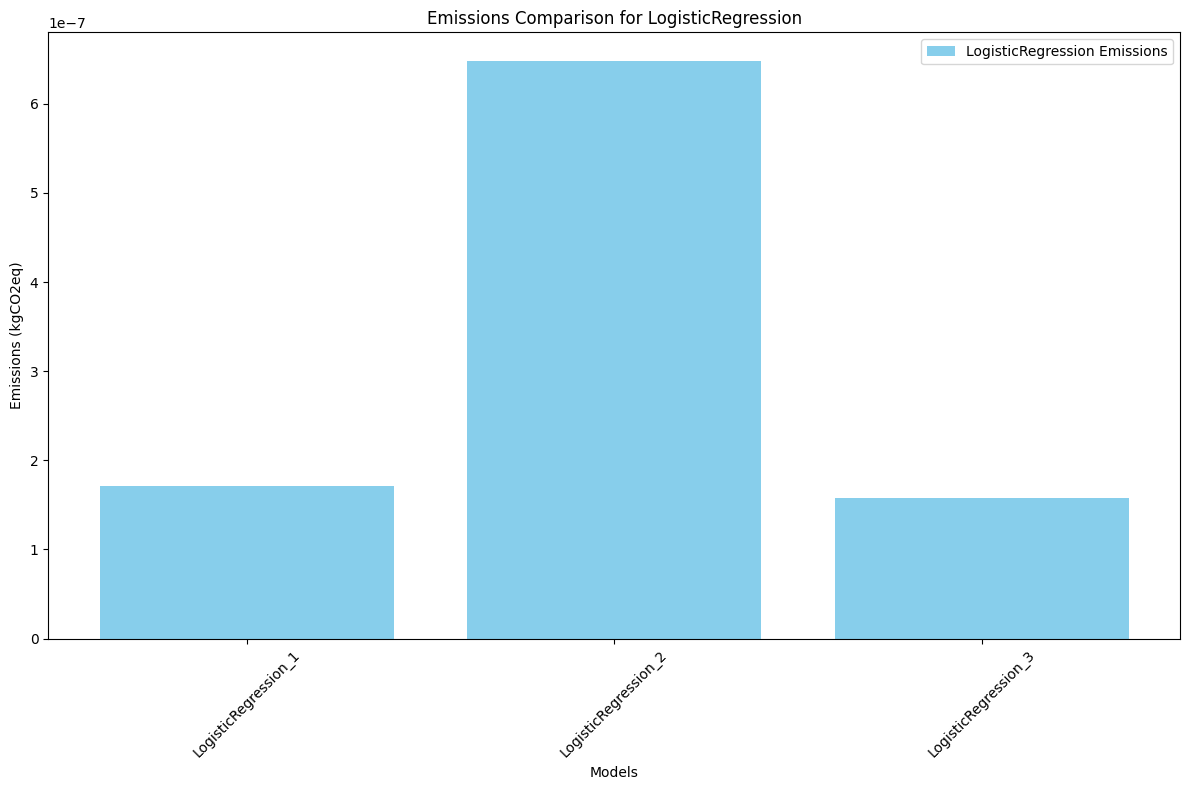

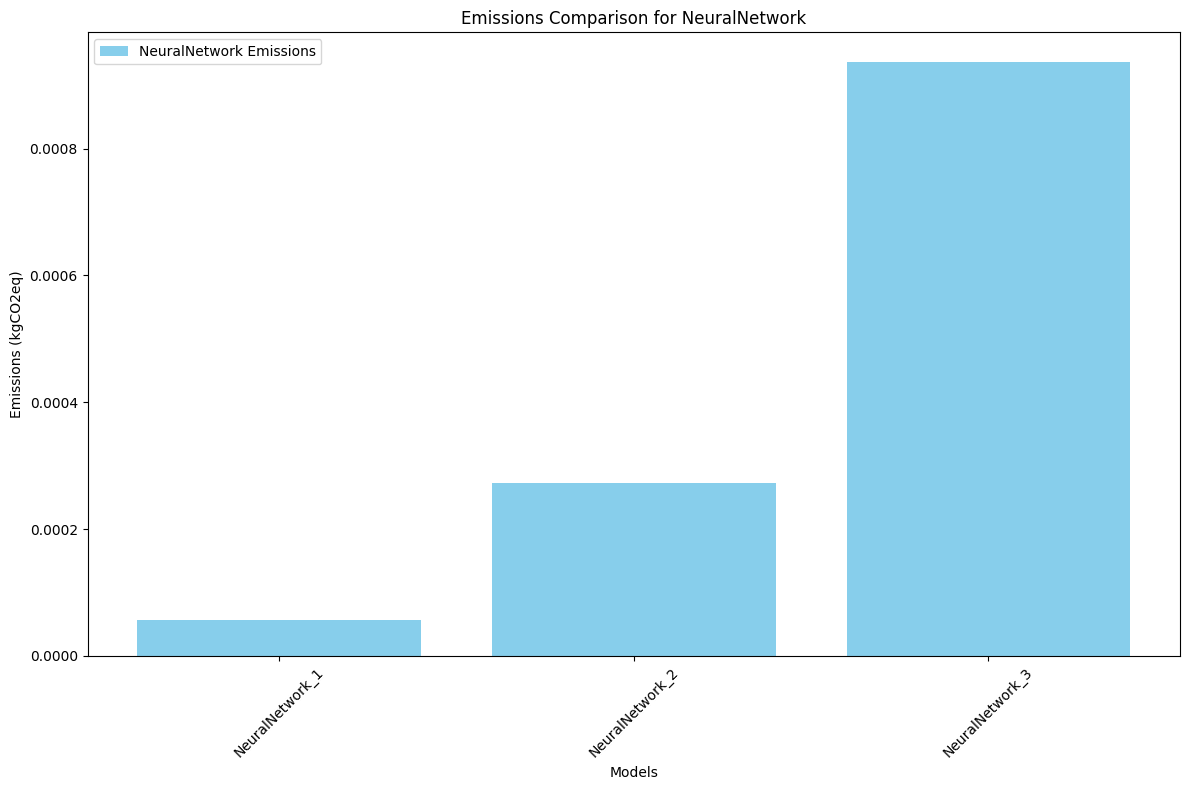

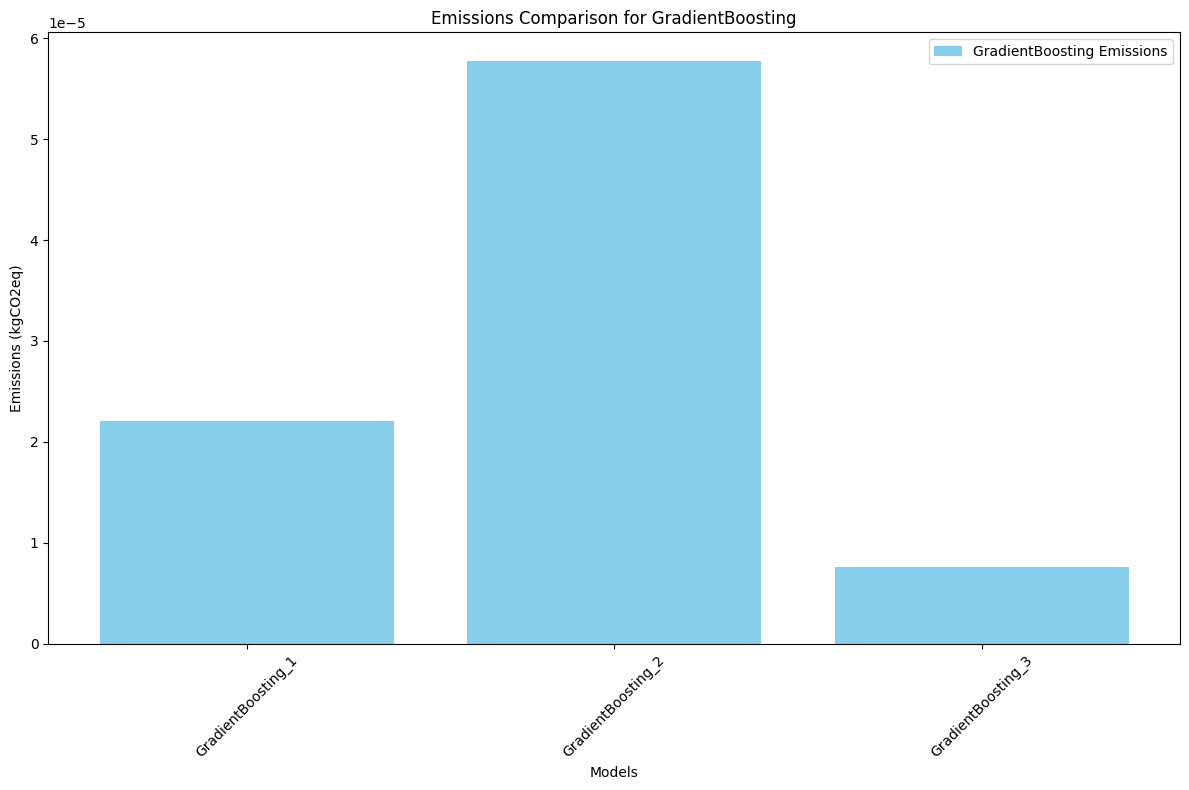

In [19]:
#Plot for Emissions
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["Emissions (kgCO2eq)"],
        color='skyblue',
        label=f'{category} Emissions'
    )
    plt.xlabel('Models')
    plt.ylabel('Emissions (kgCO2eq)')
    plt.title(f'Emissions Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

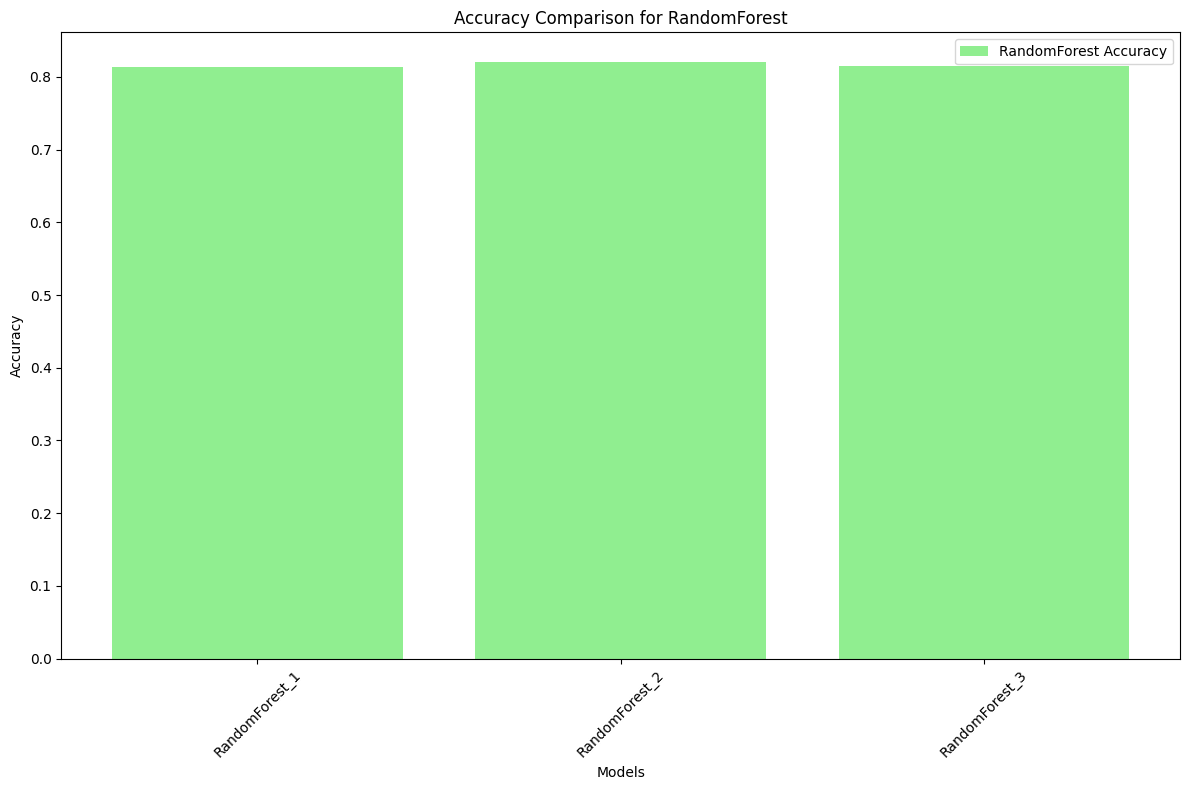

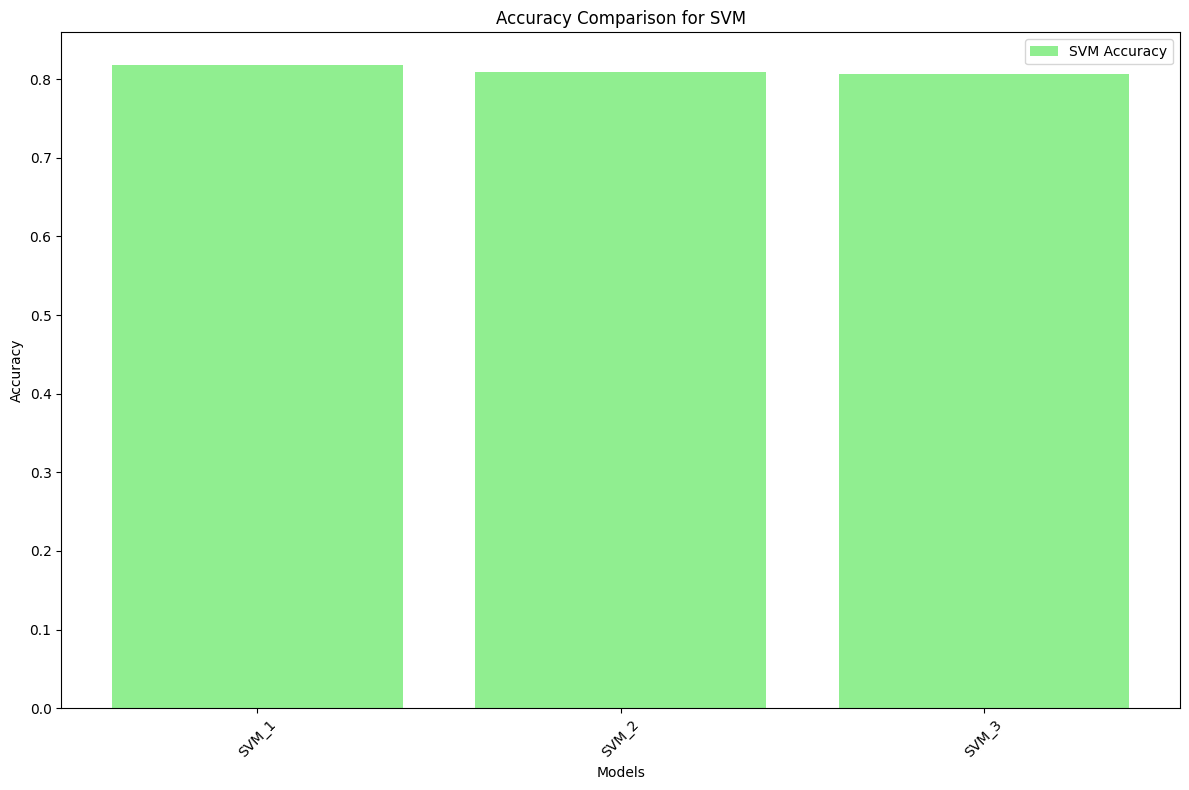

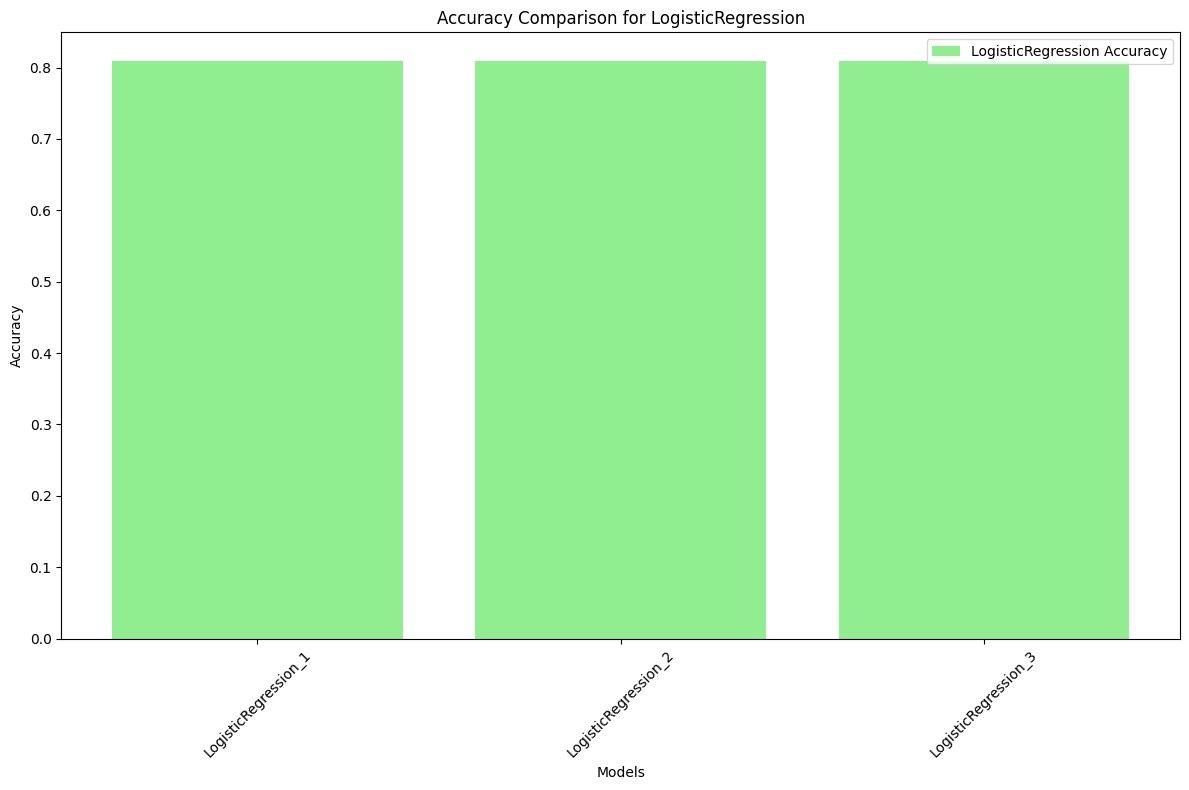

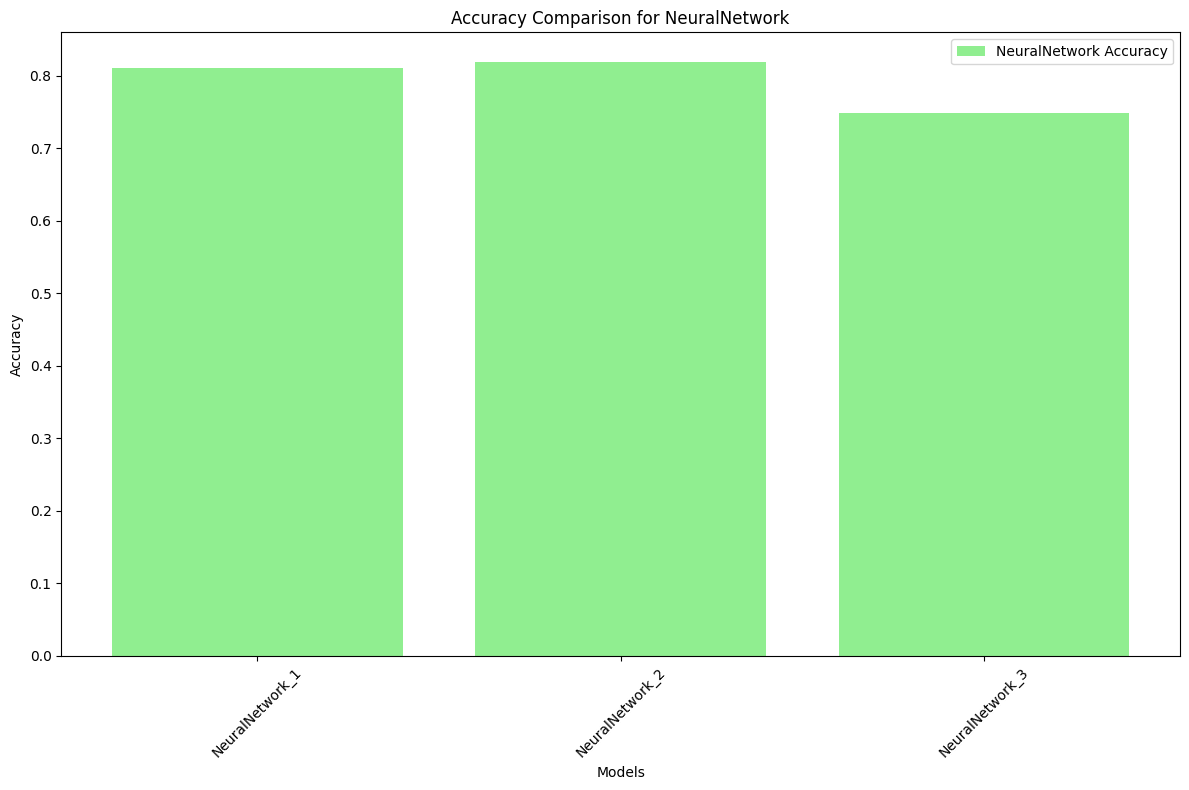

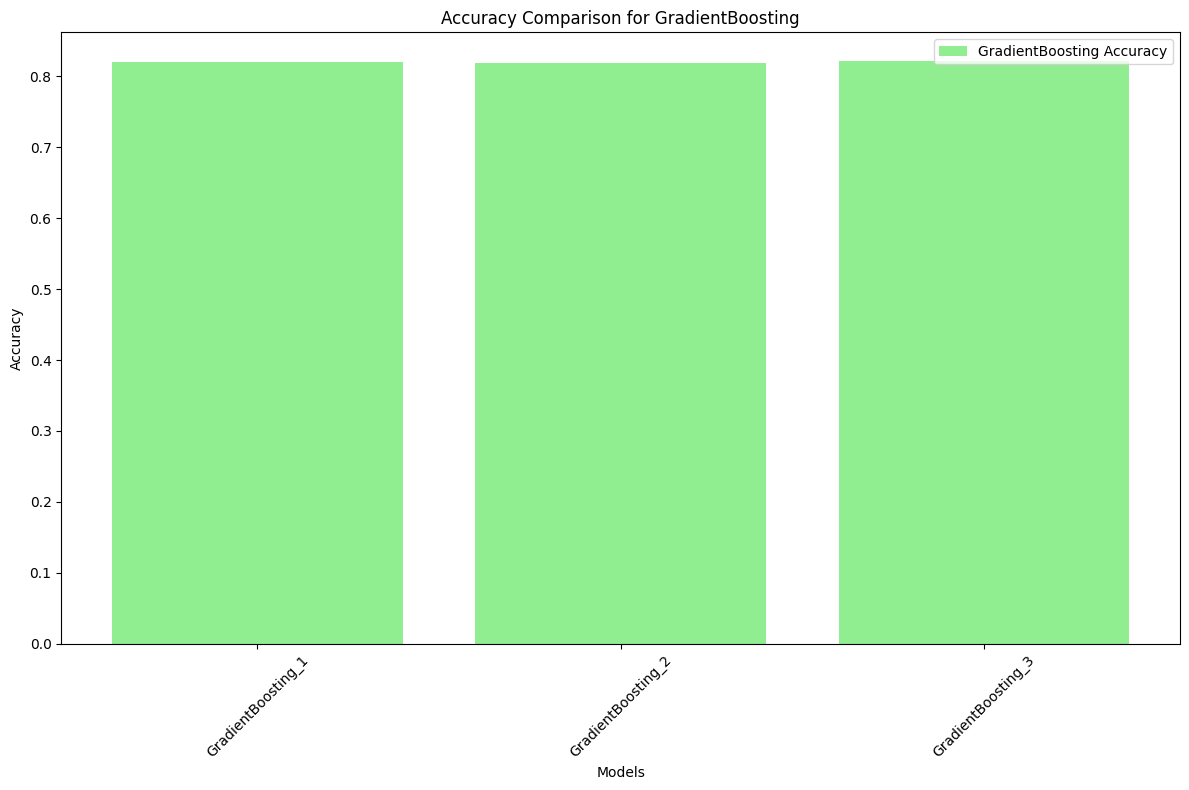

In [20]:
# 2. Plot for Accuracy
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["Accuracy"],
        color='lightgreen',
        label=f'{category} Accuracy'
    )
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

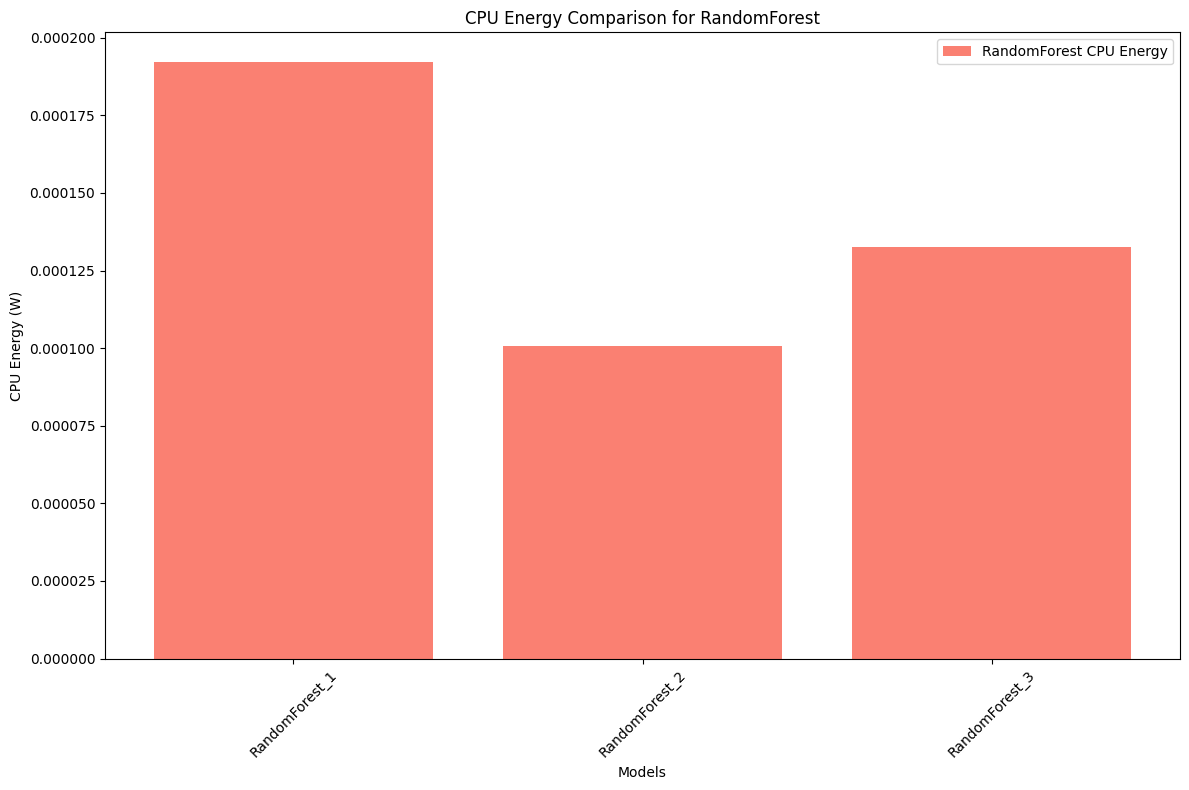

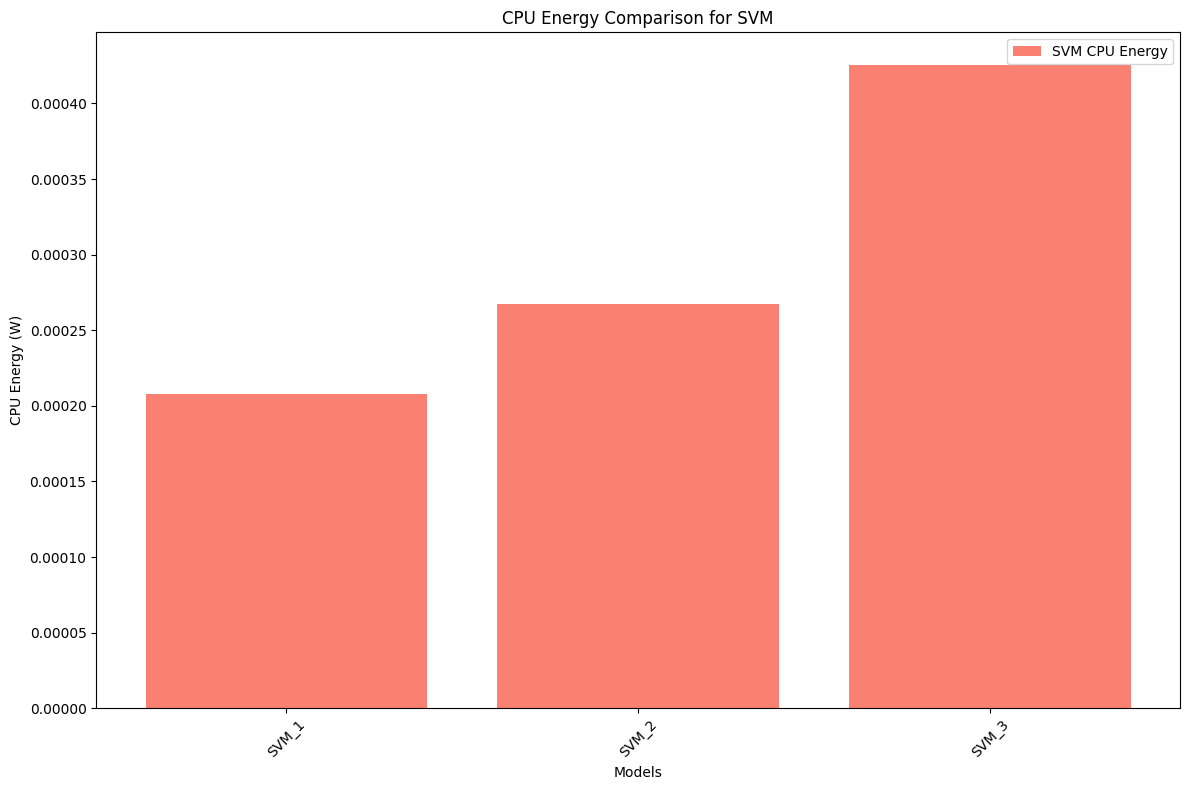

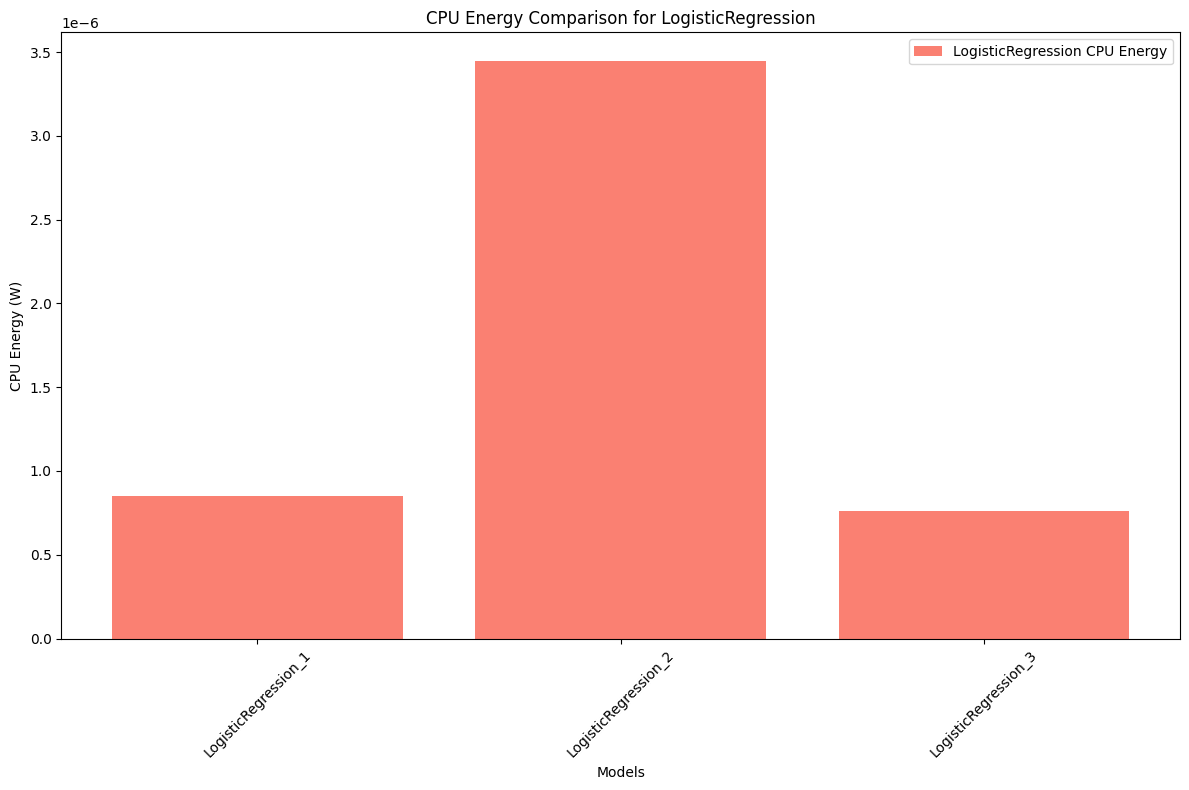

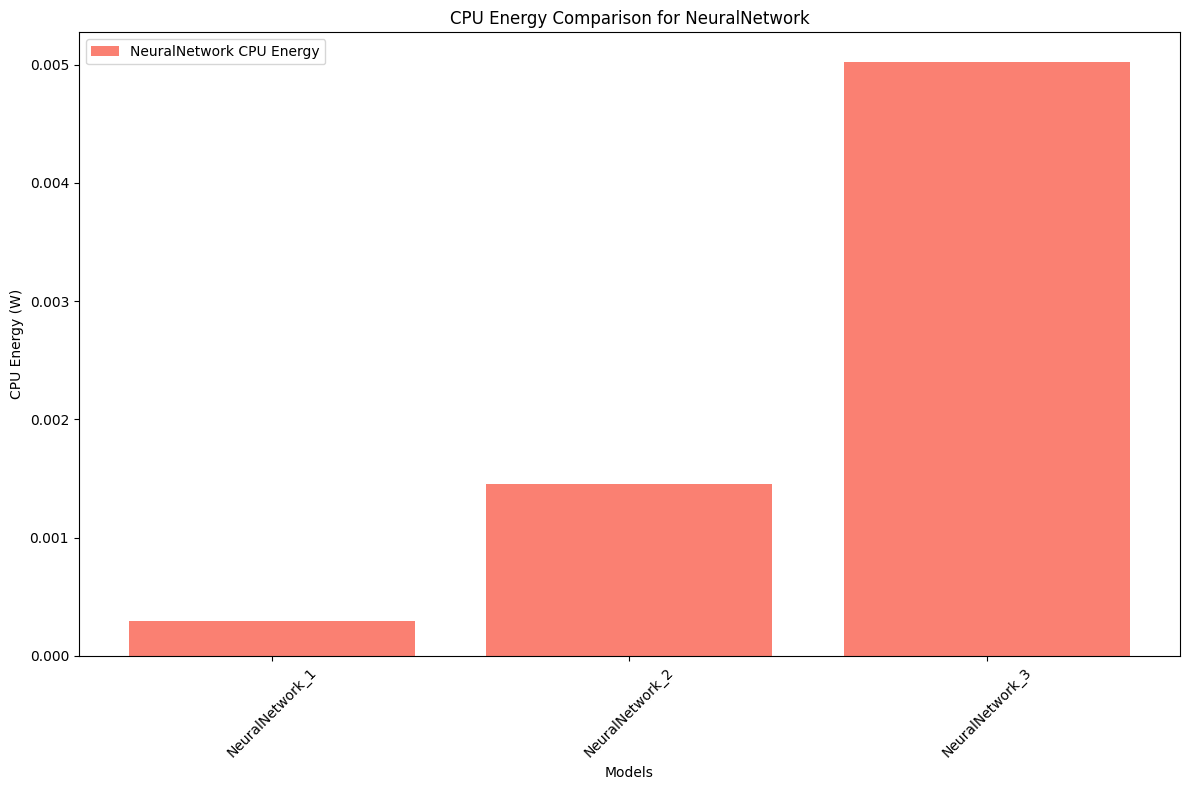

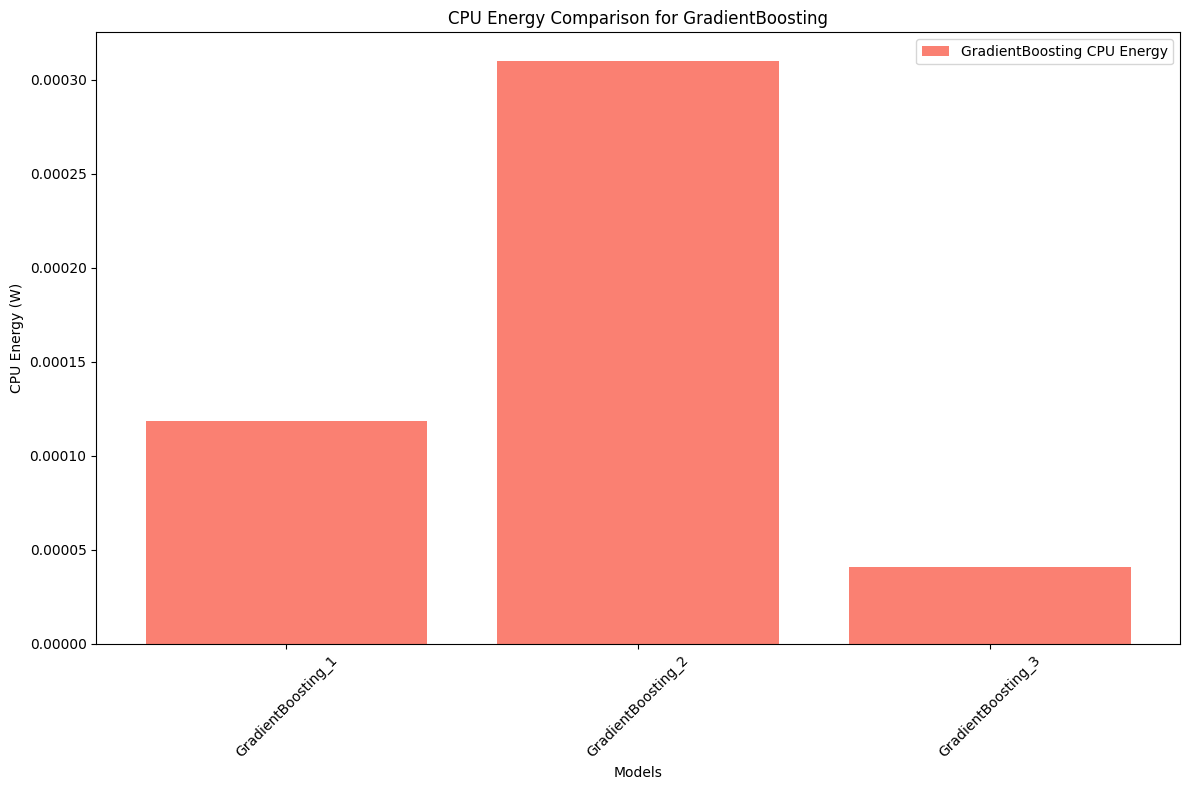

In [21]:
# 3. Plot for CPU Energy
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["CPU Energy (W)"],
        color='salmon',
        label=f'{category} CPU Energy'
    )
    plt.xlabel('Models')
    plt.ylabel('CPU Energy (W)')
    plt.title(f'CPU Energy Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

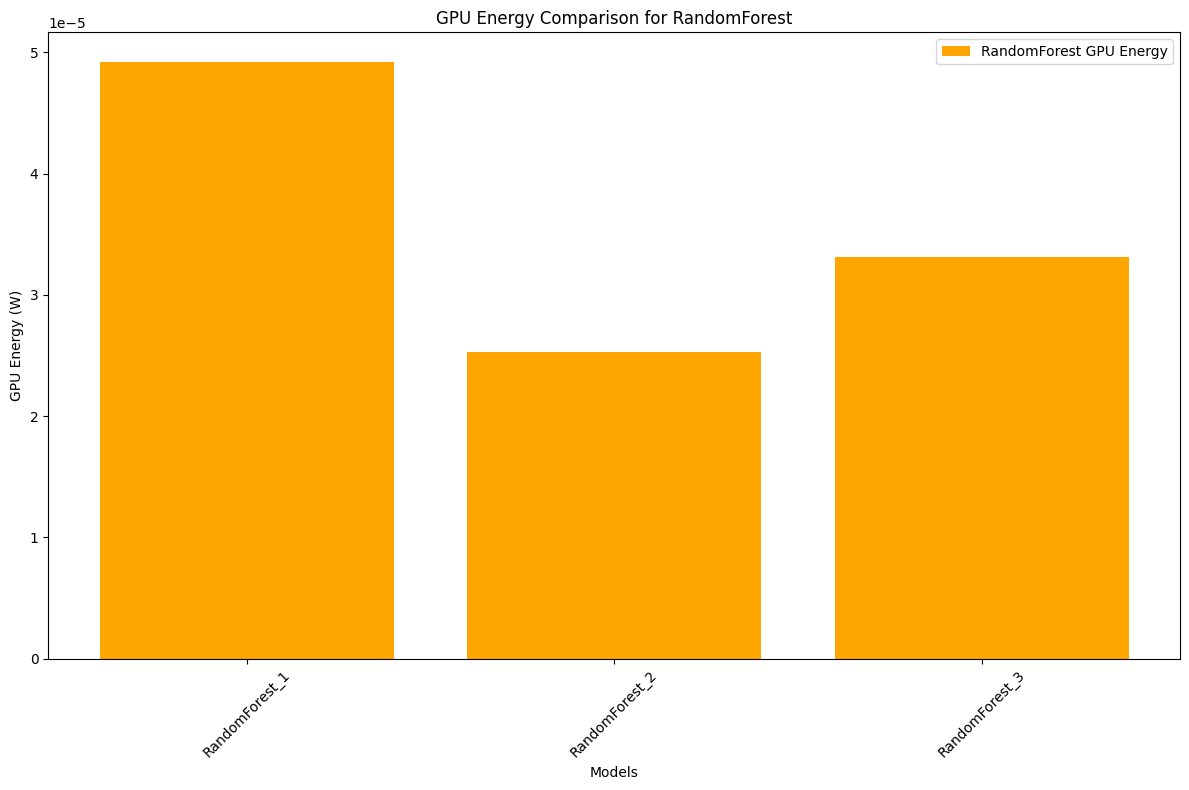

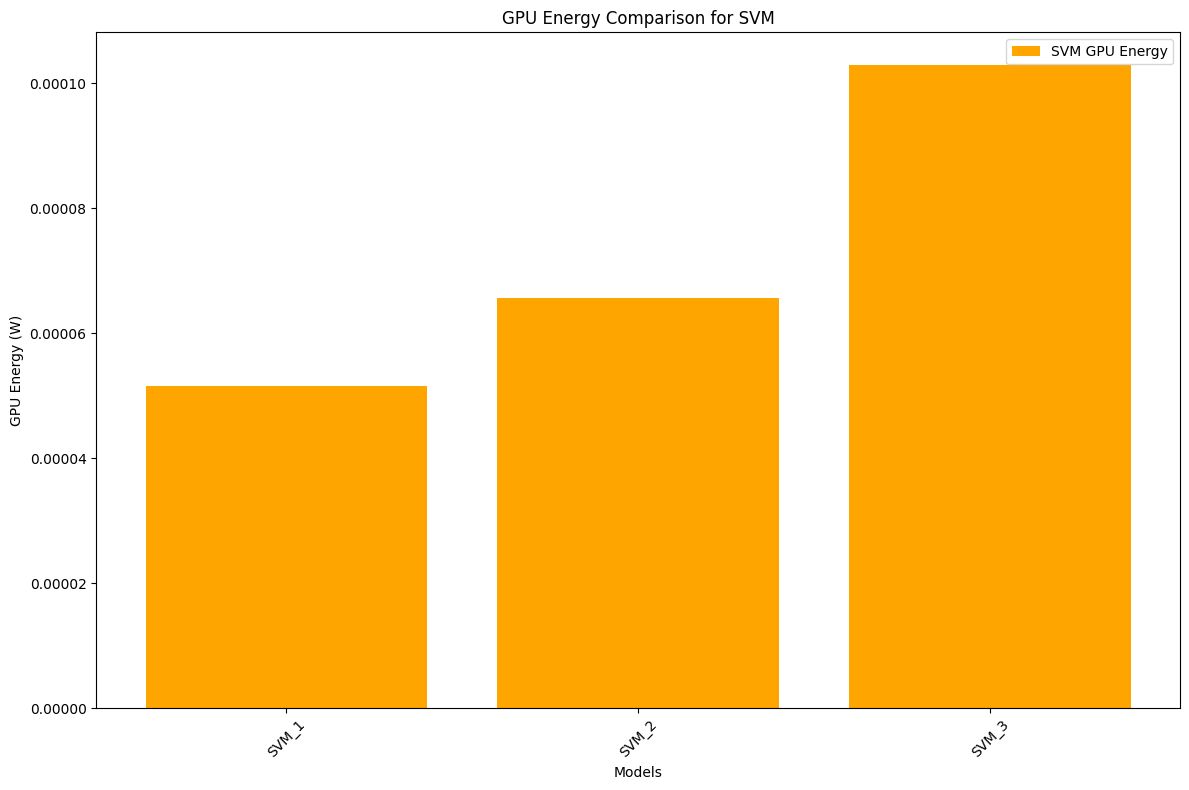

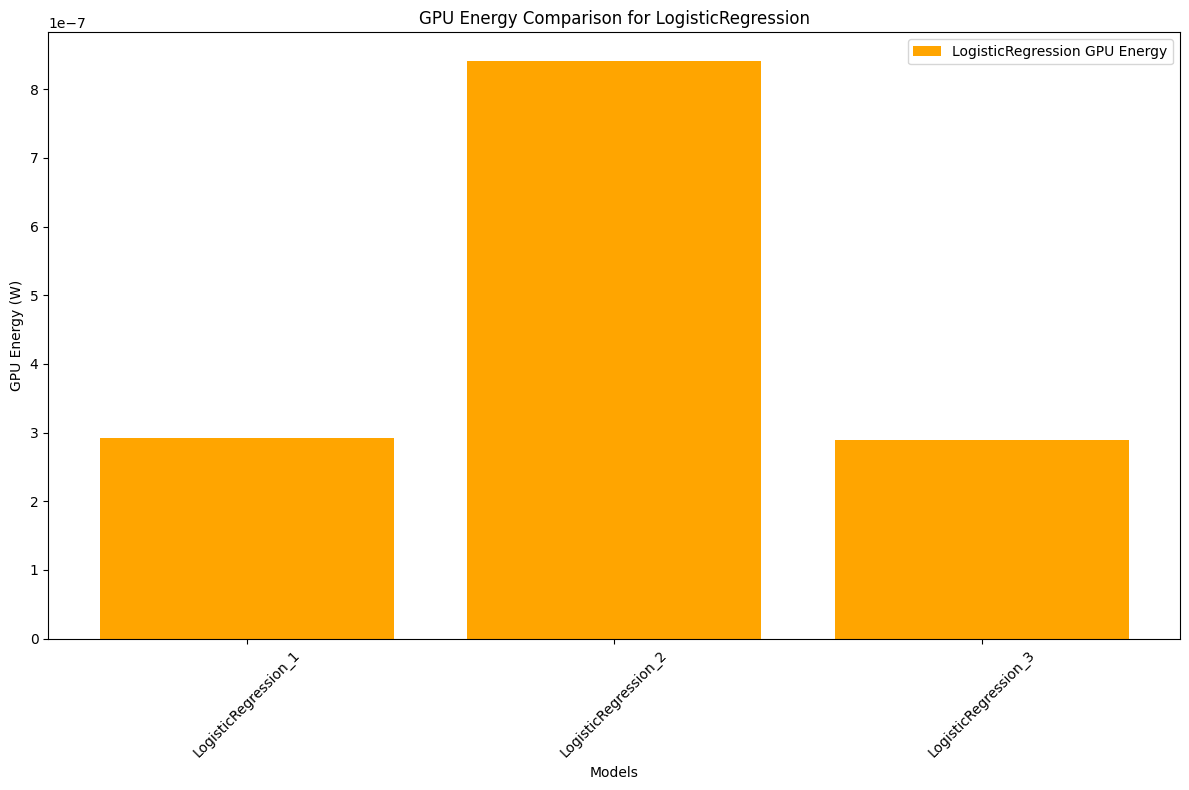

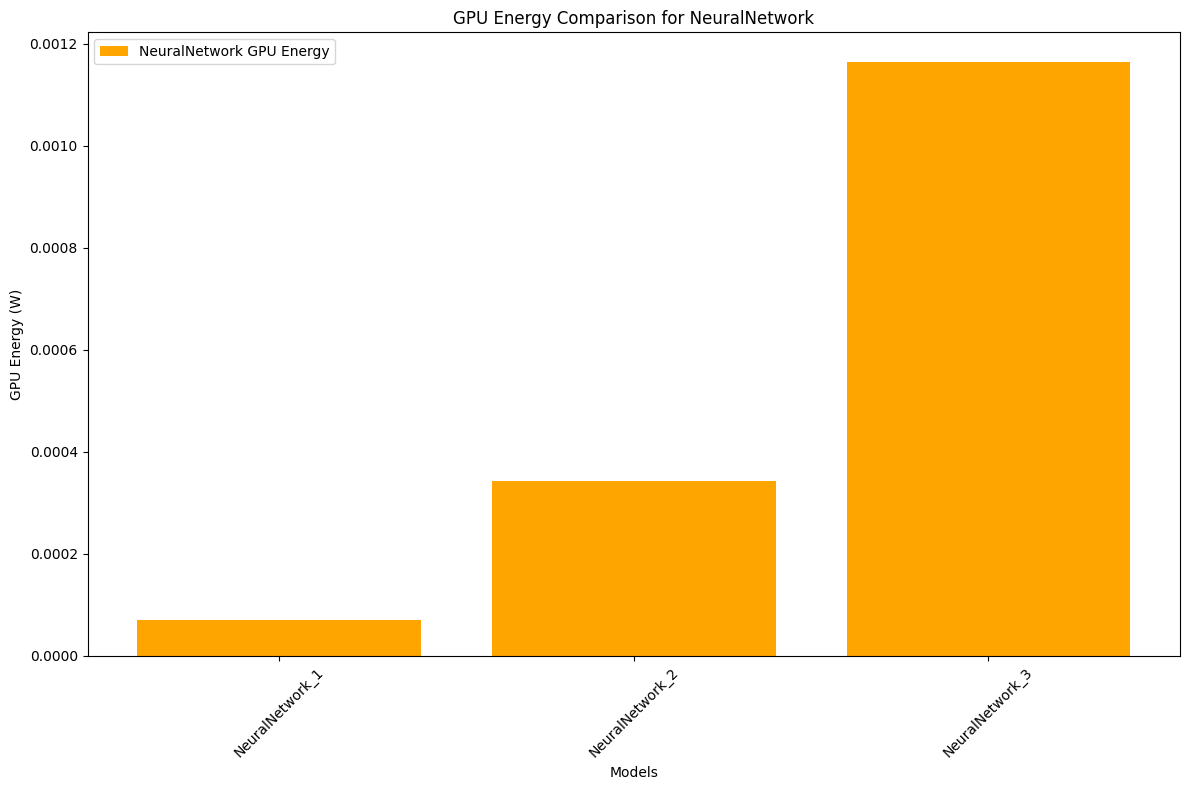

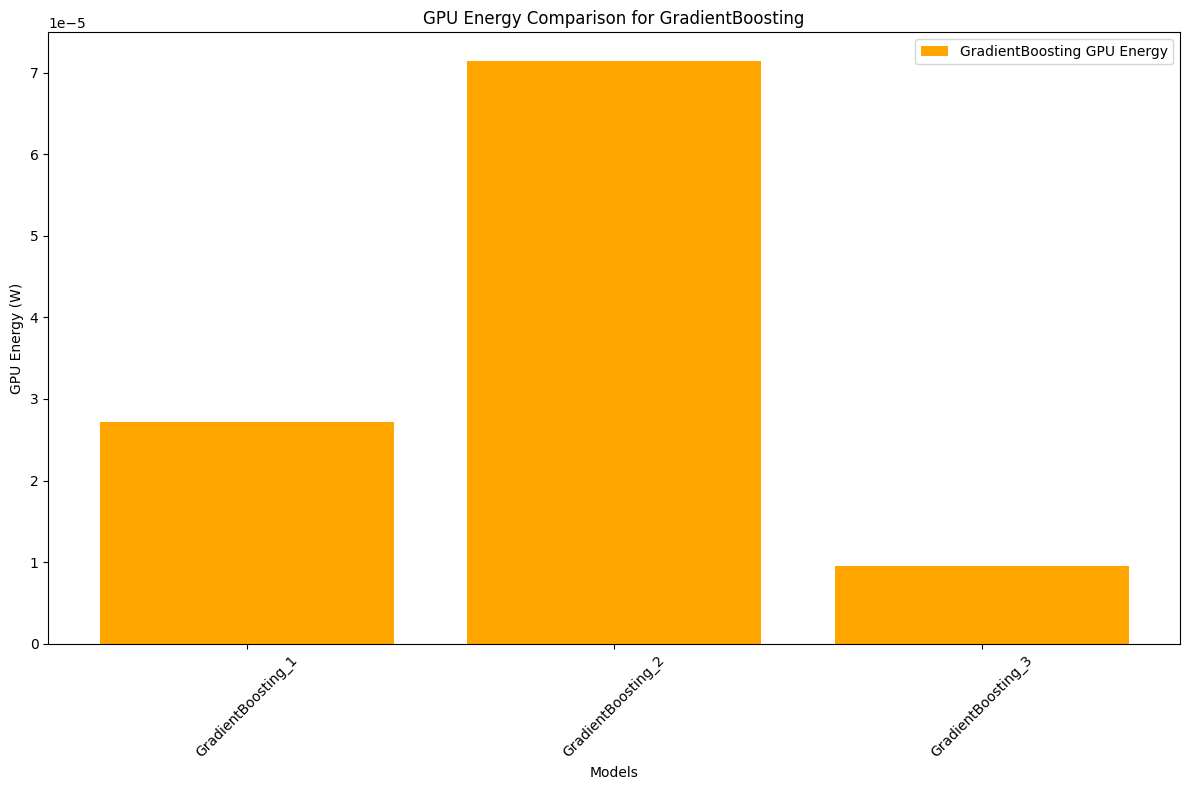

In [22]:
# 4. Plot for GPU Energy
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["GPU Energy (W)"],
        color='orange',
        label=f'{category} GPU Energy'
    )
    plt.xlabel('Models')
    plt.ylabel('GPU Energy (W)')
    plt.title(f'GPU Energy Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

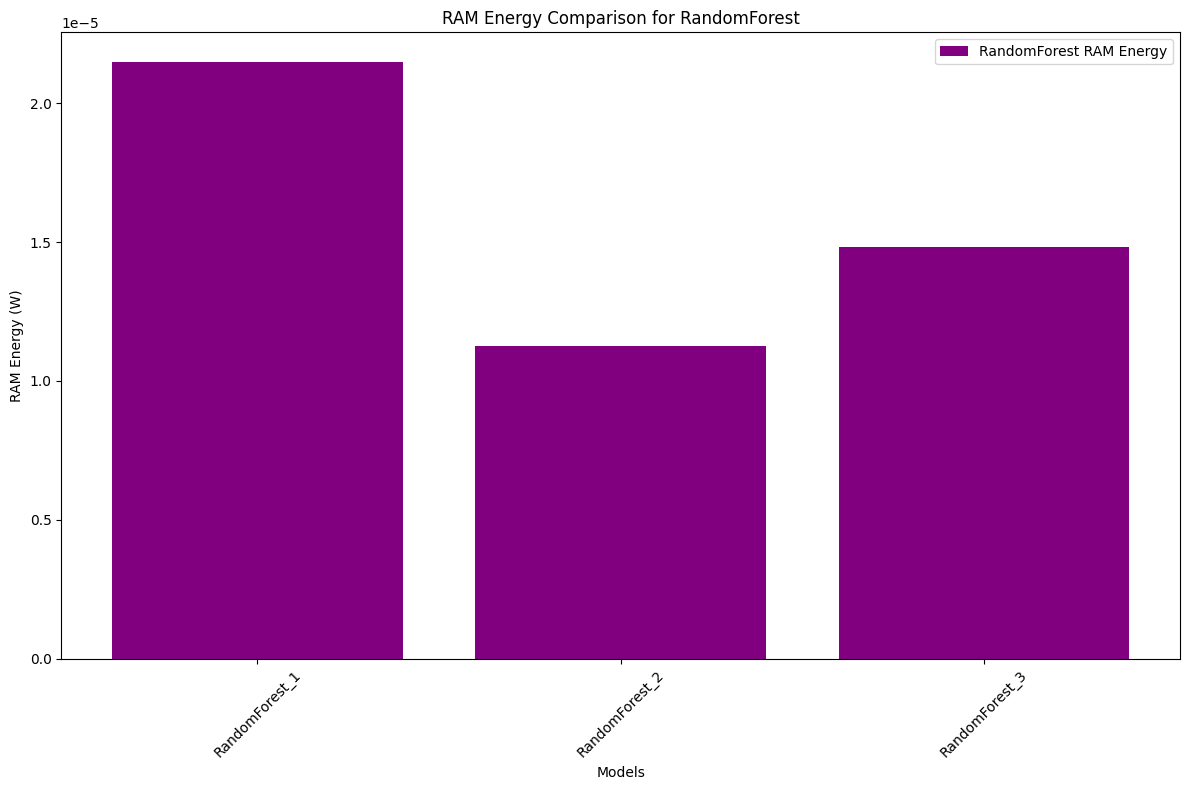

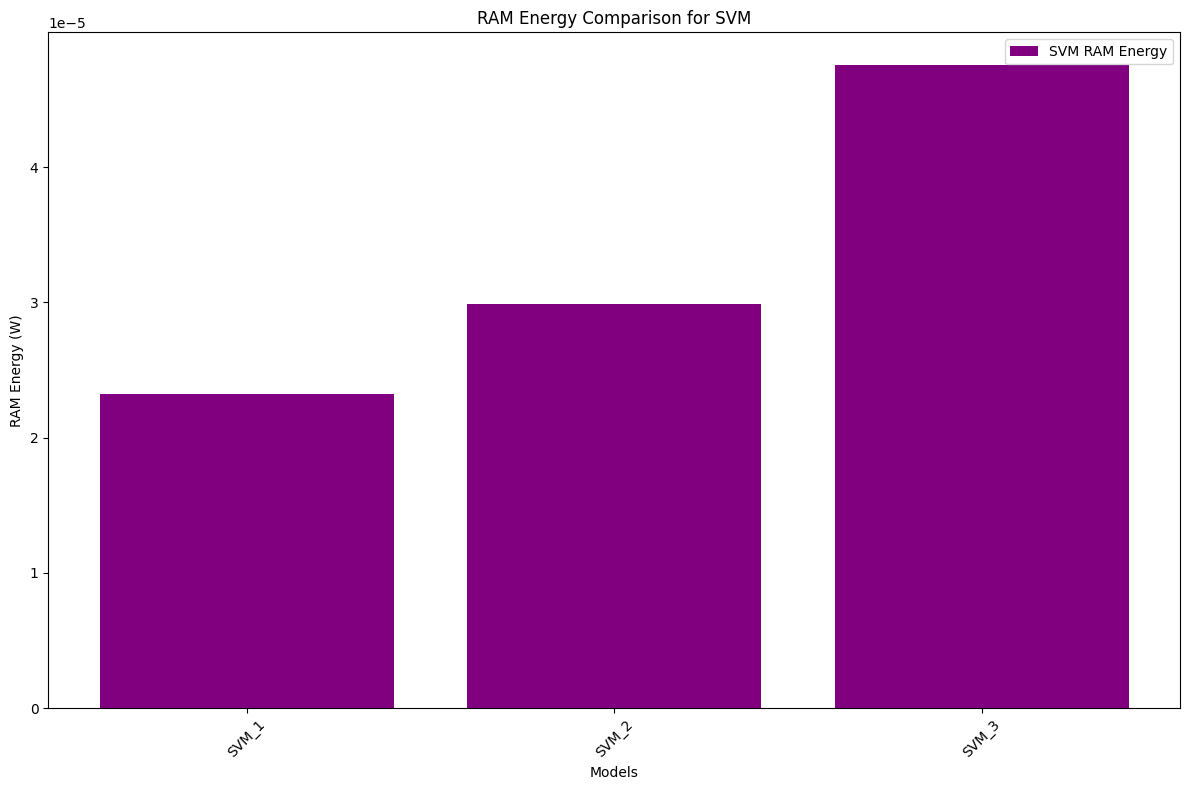

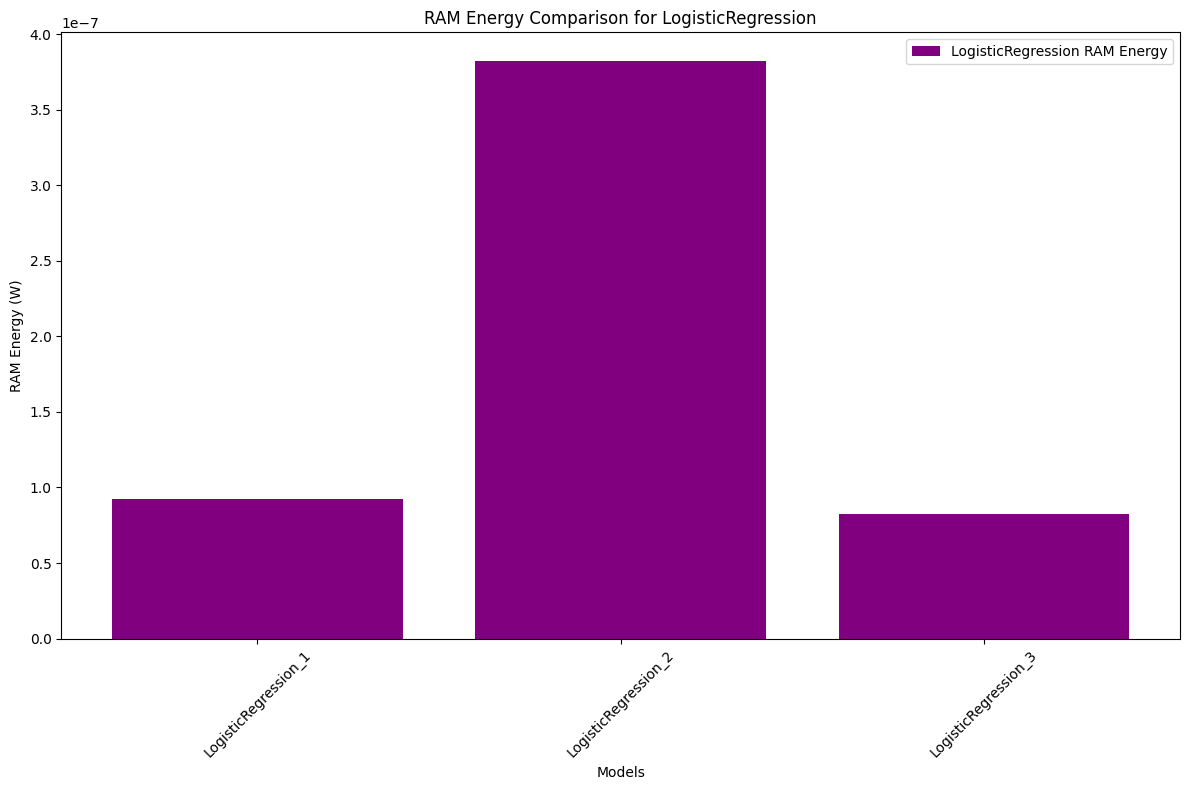

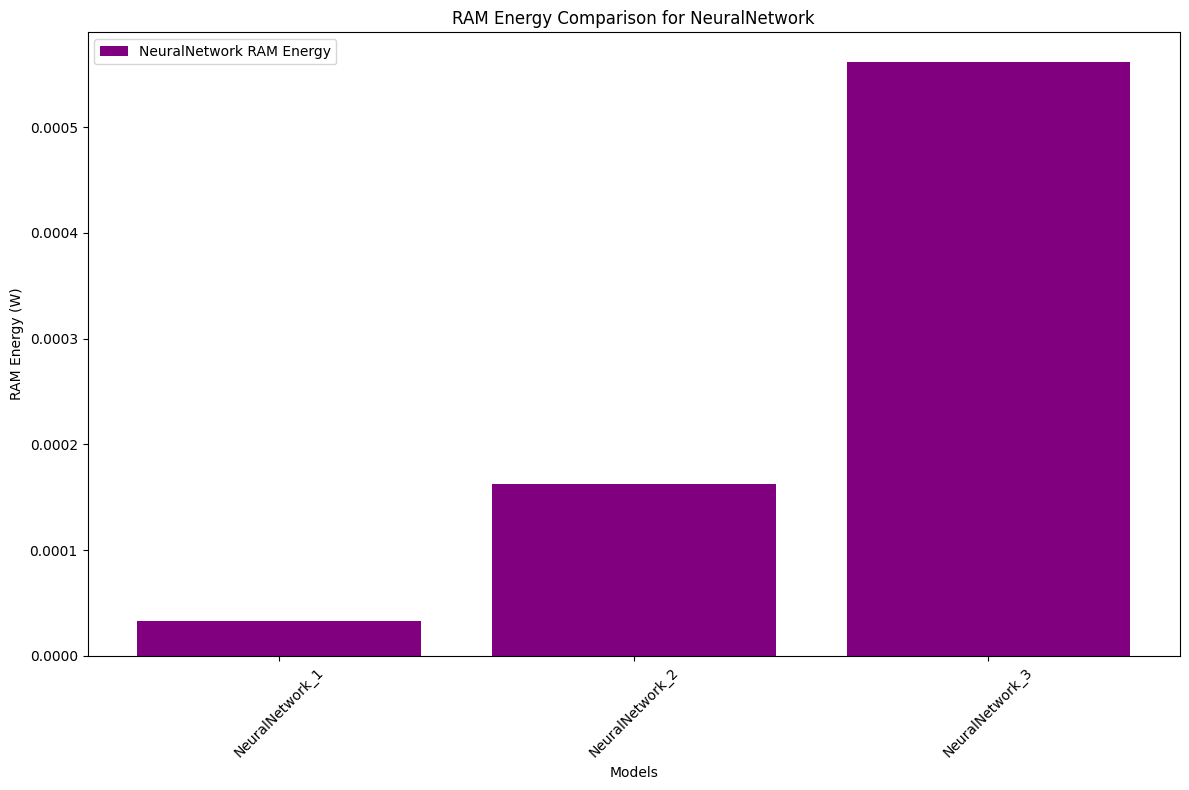

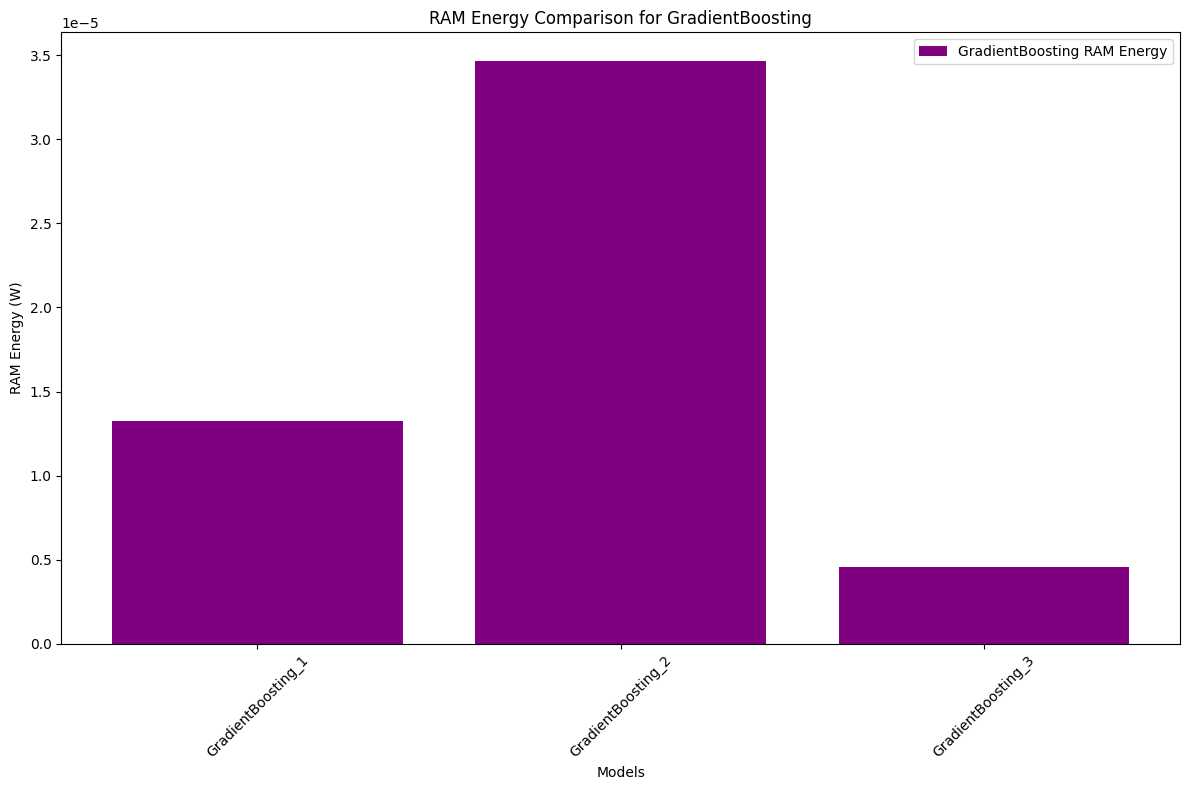

In [23]:
# 5. Plot for RAM Energy
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["RAM Energy (W)"],
        color='purple',
        label=f'{category} RAM Energy'
    )
    plt.xlabel('Models')
    plt.ylabel('RAM Energy (W)')
    plt.title(f'RAM Energy Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

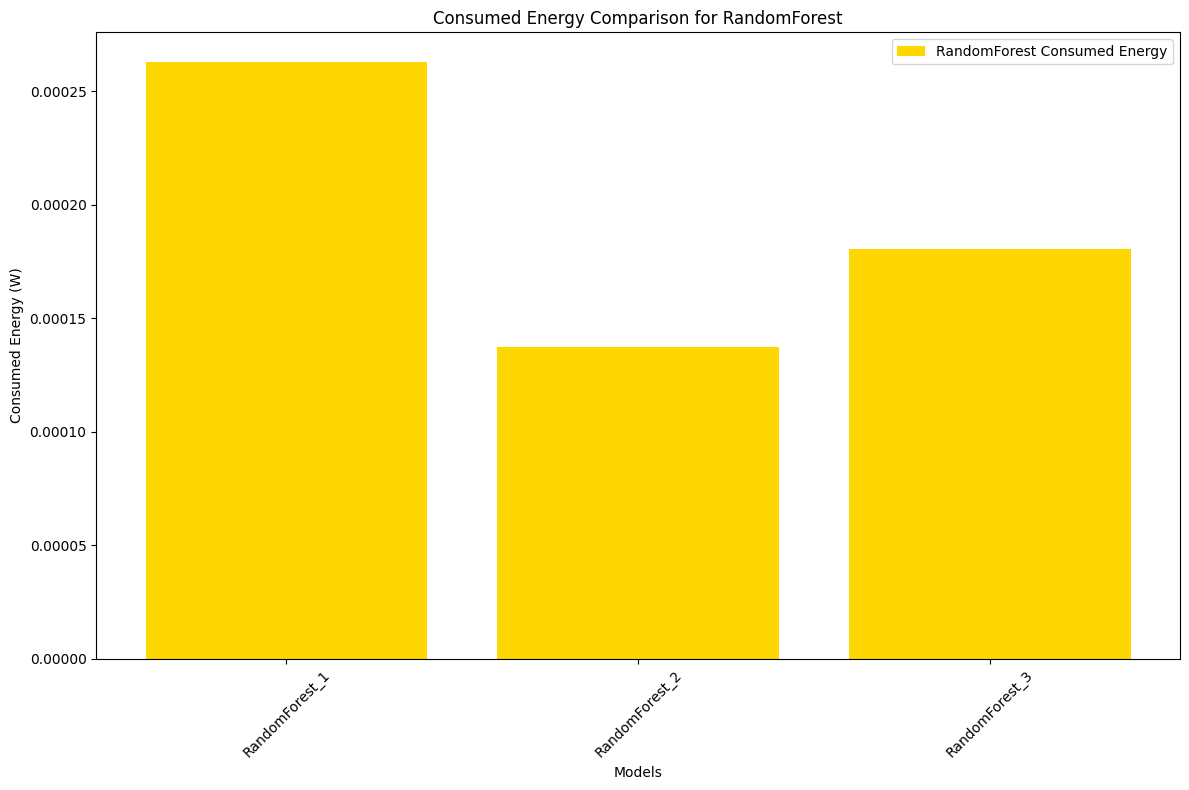

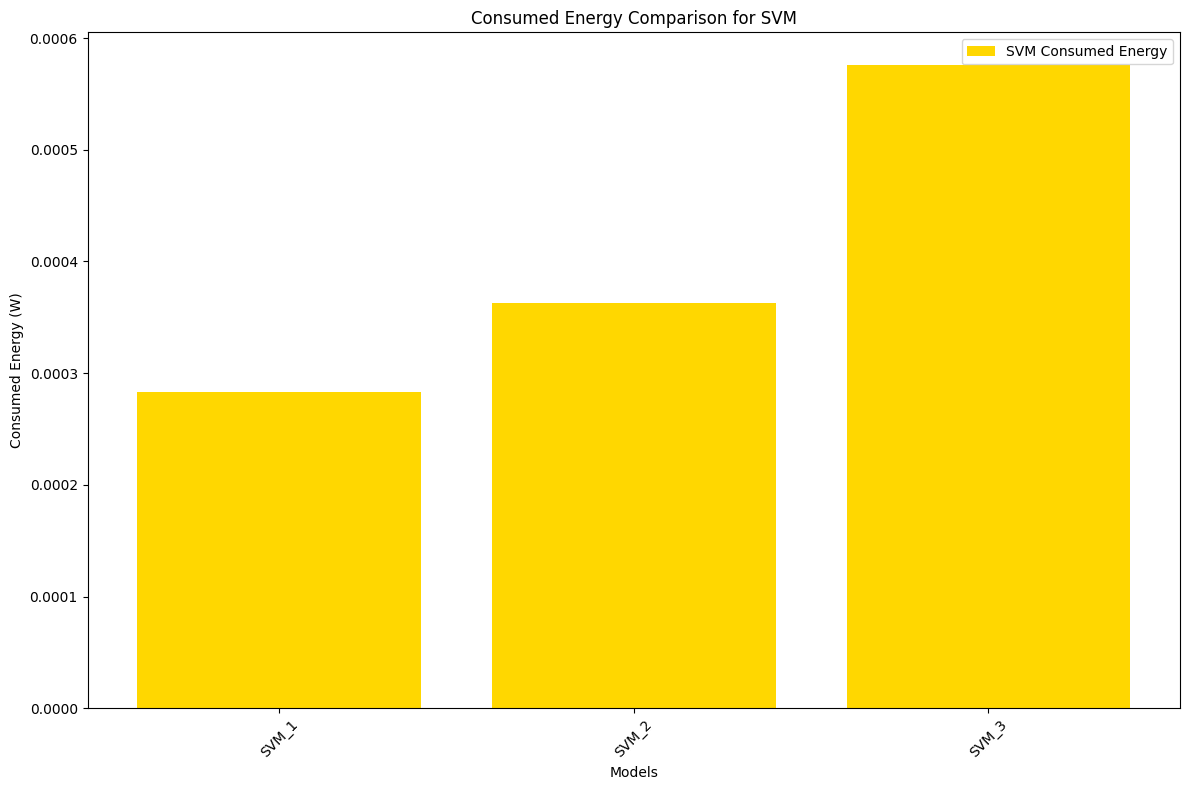

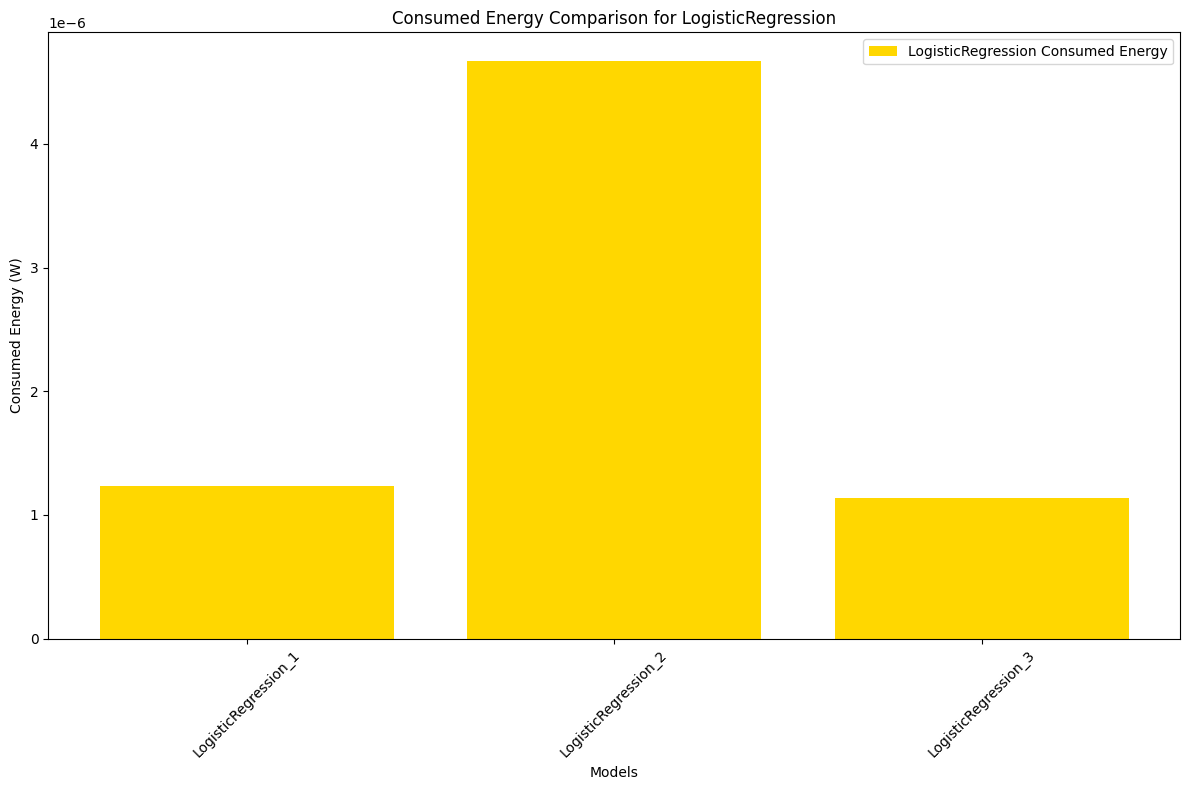

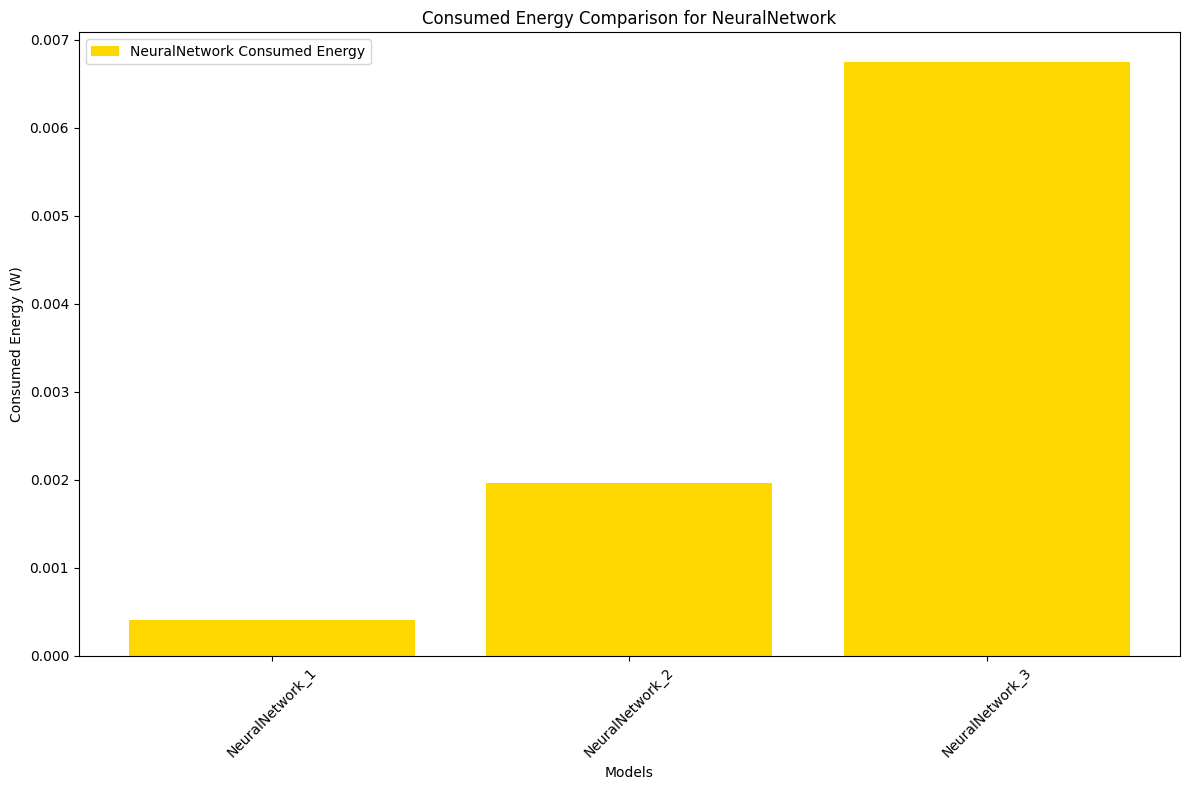

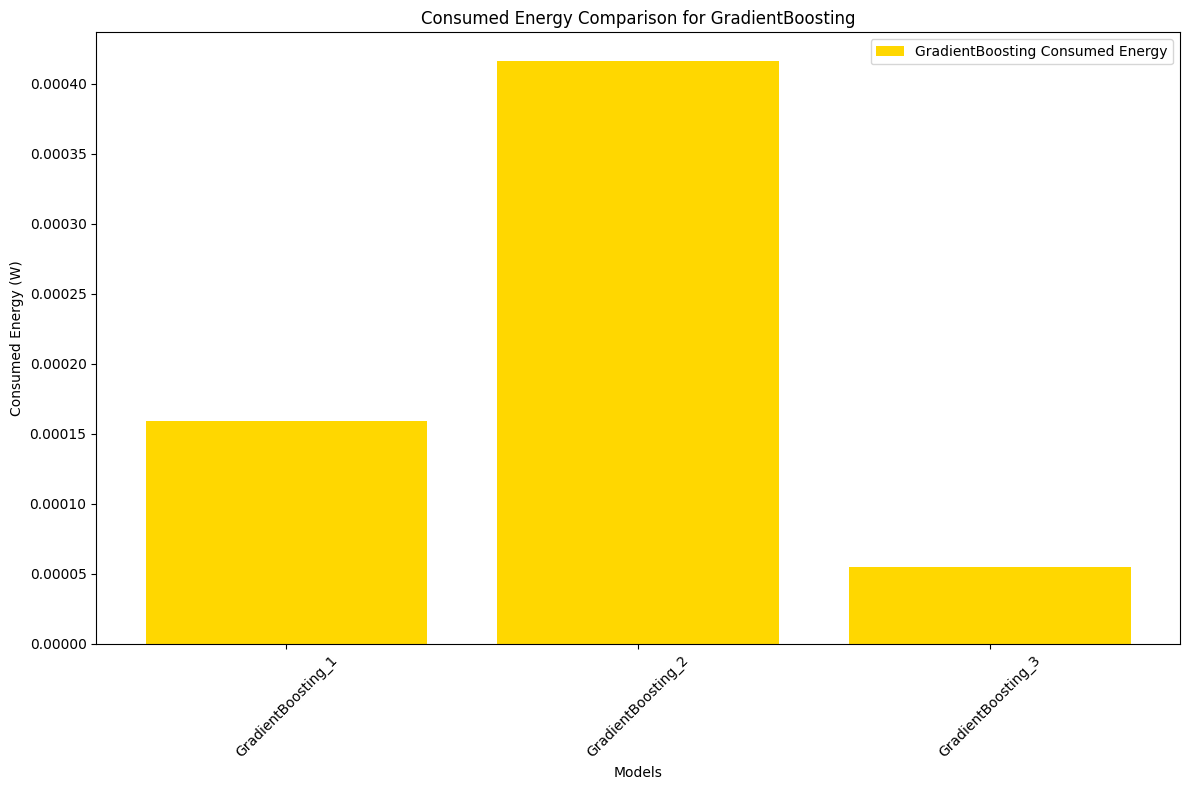

In [24]:
# 6. Plot for Consumed Energy
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.figure(figsize=(12, 8))
    plt.bar(
        category_data["Model"],
        category_data["Consumed Energy (W)"],
        color='gold',
        label=f'{category} Consumed Energy'
    )
    plt.xlabel('Models')
    plt.ylabel('Consumed Energy (W)')
    plt.title(f'Consumed Energy Comparison for {category}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Define the Neural Network with Dropout
class NeuralNetworkWithDropout(nn.Module):
    def __init__(self, input_size=23, hidden_sizes=(256, 128), output_size=2, dropout_rate=0.2):
        super(NeuralNetworkWithDropout, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_sizes[1], output_size),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

# Define the Neural Network with Early Stopping
class NeuralNetworkWithEarlyStopping(nn.Module):
    def __init__(self, input_size=23, hidden_sizes=(256, 128), output_size=2):
        super(NeuralNetworkWithEarlyStopping, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

# Function to prune Random Forest
def prune_random_forest(forest, max_depth):
    pruned_forest = RandomForestClassifier(
        n_estimators=forest.n_estimators,
        max_depth=max_depth,
        min_samples_split=4,
        random_state=forest.random_state
    )
    return pruned_forest

# Example Dataset for RandomForest Pruning
X, y = make_classification(n_samples=1000, n_features=23, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original Random Forest
original_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
original_forest.fit(X_train, y_train)

# Pruned Random Forest
pruned_forest = prune_random_forest(original_forest, max_depth=5)

# Complete Dictionary
models_config = {
    "NeuralNetwork_Dropout": {
        "model": NeuralNetworkWithDropout(input_size=23, hidden_sizes=(256, 128), output_size=2, dropout_rate=0.2),
        "framework": "PyTorch",
        "hyperparameters": {
            "input_size": 23,
            "hidden_sizes": (256, 128),
            "output_size": 2,
            "dropout_rate": 0.2,
            "optimizer": "Adam",
            "learning_rate": 0.001,
            "loss_function": "CrossEntropyLoss"
        }
    },
    "NeuralNetwork_EarlyStopping": {
        "model": NeuralNetworkWithEarlyStopping(input_size=23, hidden_sizes=(256, 128), output_size=2),
        "framework": "PyTorch",
        "hyperparameters": {
            "input_size": 23,
            "hidden_sizes": (256, 128),
            "output_size": 2,
            "optimizer": "Adam",
            "learning_rate": 0.001,
            "loss_function": "CrossEntropyLoss",
            "early_stopping_patience": 5
        }
    },
    "RandomForest_Prune": {
        "model": pruned_forest,
        "framework": "scikit-learn",
        "hyperparameters": {
            "n_estimators": 100,
            "max_depth": 5,
            "min_samples_split": 4,
            "random_state": 42
        }
    }
}

# Example usage of dictionary
print(models_config)


{'NeuralNetwork_Dropout': {'model': NeuralNetworkWithDropout(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=2, bias=True)
    (7): Softmax(dim=1)
  )
), 'framework': 'PyTorch', 'hyperparameters': {'input_size': 23, 'hidden_sizes': (256, 128), 'output_size': 2, 'dropout_rate': 0.2, 'optimizer': 'Adam', 'learning_rate': 0.001, 'loss_function': 'CrossEntropyLoss'}}, 'NeuralNetwork_EarlyStopping': {'model': NeuralNetworkWithEarlyStopping(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
    (5): Softmax(dim=1)
  )
), 'framework': 'PyTorch', 'hyperparame

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from codecarbon import EmissionsTracker

# Define the dictionary with grouped models by category
categories = {
    "NeuralNetwork": {
        "NeuralNetwork_Dropout": models_config["NeuralNetwork_Dropout"],
        "NeuralNetwork_EarlyStopping": models_config["NeuralNetwork_EarlyStopping"]
    },
    "RandomForest": {
        "RandomForest_Prune": models_config["RandomForest_Prune"]
    }
}

# Initialize an empty dictionary to hold results for each category
category_results = {category: [] for category in categories}

# Train and track emissions for each model in each category
for category, models in categories.items():
    for model_name, model_info in models.items():
        tracker = EmissionsTracker(project_name=model_name)
        tracker.start()

        # Train the model
        model = model_info["model"]
        if category == "NeuralNetwork":  # PyTorch Models
            optimizer = optim.Adam(model.parameters(), lr=model_info["hyperparameters"]["learning_rate"])
            loss_fn = nn.CrossEntropyLoss()

            # Convert data to tensors
            X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
            y_train_tensor = torch.tensor(y_train, dtype=torch.long)
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

            # Train the model
            model.train()
            for epoch in range(500):  # Adjust epochs as needed
                optimizer.zero_grad()
                output = model(X_train_tensor)
                loss = loss_fn(output, y_train_tensor)
                loss.backward()
                optimizer.step()

            # Evaluate the model
            model.eval()
            with torch.no_grad():
                y_pred_tensor = model(X_test_tensor)
                y_pred = y_pred_tensor.argmax(dim=1).numpy()

        else:  # Scikit-learn Models
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Stop tracker and calculate accuracy
        emissions = tracker.stop()
        acc = accuracy_score(y_test, y_pred)
        emissions_data = pd.read_csv("emissions.csv")
        latest_emission = emissions_data.iloc[-1]  # Get the latest record

        # Extract power consumption metrics
        cpu_energy = latest_emission["cpu_energy"]
        gpu_energy = latest_emission["gpu_energy"]
        ram_energy = latest_emission["ram_energy"]
        energy_consumed = latest_emission["energy_consumed"]
        emissions = latest_emission["emissions"]
        # Store the results
        category_results[category].append({
            "Model": model_name,
            "Hyperparameters": str(model_info["hyperparameters"]),
            "Accuracy": acc,
            "Emissions (kgCO2eq)": emissions,
            "CPU Energy (W)": cpu_energy,
            "GPU Energy (W)": gpu_energy,
            "RAM Energy (W)": ram_energy,
            "Consumed Energy (W)": energy_consumed
        })

        print(f"\nModel: {model_name} ({category})")
        print(classification_report(y_test, y_pred))

# Save results for each category to separate CSV files
for category, results in category_results.items():
    results_df = pd.DataFrame(results)
    results_df.to_csv(f"{category}_Optimized_results.csv", index=False)

# Prepare data for visualization
plot_data = []
for category, results in category_results.items():
    for result in results:
        plot_data.append({
            "Category": category,
            "Model": result["Model"],
            "Emissions (kgCO2eq)": result["Emissions (kgCO2eq)"]
        })




[codecarbon INFO @ 18:00:04] [setup] RAM Tracking...
[codecarbon INFO @ 18:00:04] [setup] CPU Tracking...
[codecarbon WARNING @ 18:00:04] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 18:00:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 18:00:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:00:05] [setup] GPU Tracking...
[codecarbon INFO @ 18:00:05] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:00:05] >>> Tracker's metadata:
[codecarbon INFO @ 18:00:05]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 18:00:05]   Python version: 3.10.12
[codecarbon INFO @ 18:00:05]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 18:00:05]   Available RAM : 12.675 GB
[codecarbon INFO @ 18:00:05]   CPU count: 2
[codeca


Model: NeuralNetwork_Dropout (NeuralNetwork)
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.84      0.83      0.84        90

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



[codecarbon WARNING @ 18:00:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 18:00:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:00:13] [setup] GPU Tracking...
[codecarbon INFO @ 18:00:13] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:00:13] >>> Tracker's metadata:
[codecarbon INFO @ 18:00:13]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 18:00:13]   Python version: 3.10.12
[codecarbon INFO @ 18:00:13]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 18:00:13]   Available RAM : 12.675 GB
[codecarbon INFO @ 18:00:13]   CPU count: 2
[codecarbon INFO @ 18:00:13]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:00:13]   GPU count: 1
[codecarbon INFO @ 18:00:13]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 18:00:13] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 18:00:15] Energy consumed for RAM : 0


Model: NeuralNetwork_EarlyStopping (NeuralNetwork)
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.86      0.79      0.82        90

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



[codecarbon WARNING @ 18:00:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 18:00:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:00:16] [setup] GPU Tracking...
[codecarbon INFO @ 18:00:16] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 18:00:16] >>> Tracker's metadata:
[codecarbon INFO @ 18:00:16]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 18:00:16]   Python version: 3.10.12
[codecarbon INFO @ 18:00:16]   CodeCarbon version: 2.8.2
[codecarbon INFO @ 18:00:16]   Available RAM : 12.675 GB
[codecarbon INFO @ 18:00:16]   CPU count: 2
[codecarbon INFO @ 18:00:16]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 18:00:16]   GPU count: 1
[codecarbon INFO @ 18:00:16]   GPU model: 1 x Tesla T4
[codecarbon INFO @ 18:00:17] Saving emissions data to file /content/emissions.csv
[codecarbon INFO @ 18:00:17] Energy consumed for RAM : 0


Model: RandomForest_Prune (RandomForest)
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.88      0.89      0.88        90

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



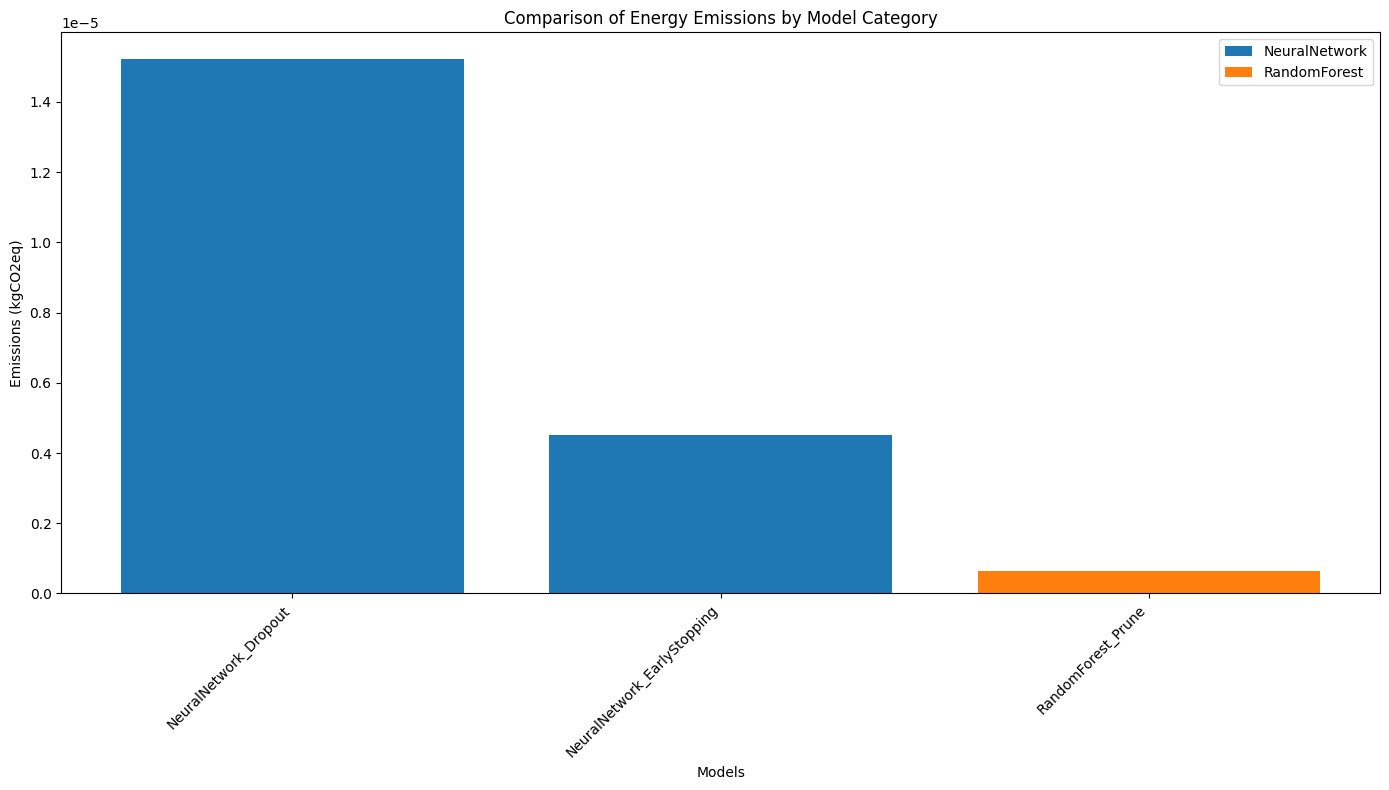

In [27]:
plot_df = pd.DataFrame(plot_data)

# Plot emissions by category
plt.figure(figsize=(14, 8))
for category in plot_df["Category"].unique():
    category_data = plot_df[plot_df["Category"] == category]
    plt.bar(
        category_data["Model"],
        category_data["Emissions (kgCO2eq)"],
        label=category
    )

plt.xlabel("Models")
plt.ylabel("Emissions (kgCO2eq)")
plt.title("Comparison of Energy Emissions by Model Category")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

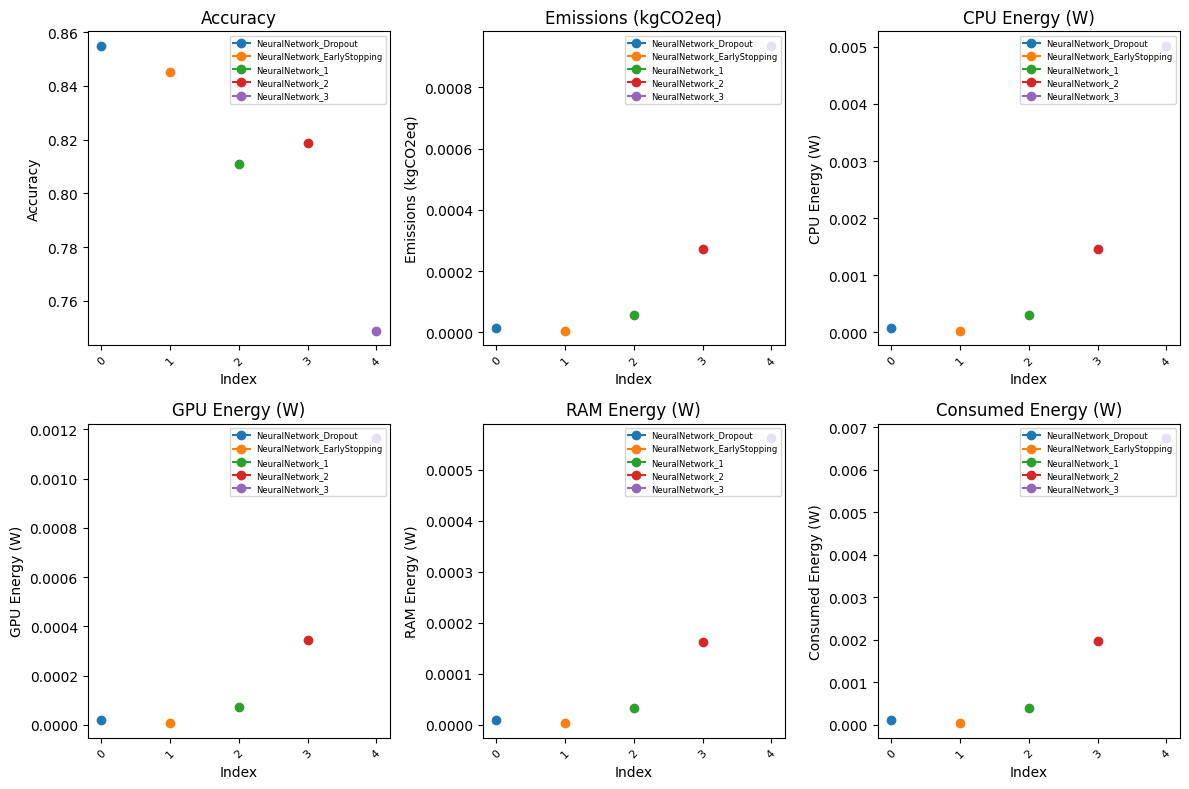

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the two CSV files
file1_path = 'NeuralNetwork_Optimized_results.csv'
file2_path = 'NeuralNetwork_results.csv'

# Load both files into DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Combine the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Columns to plot
numeric_columns = ['Accuracy', 'Emissions (kgCO2eq)', 'CPU Energy (W)',
                   'GPU Energy (W)', 'RAM Energy (W)', 'Consumed Energy (W)']

# Plot each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    for model in combined_df['Model'].unique():
        subset = combined_df[combined_df['Model'] == model]
        plt.plot(subset.index, subset[column], marker='o', label=model)
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(loc='upper right', fontsize=6)
    plt.tight_layout()

# Show the plots
plt.show()


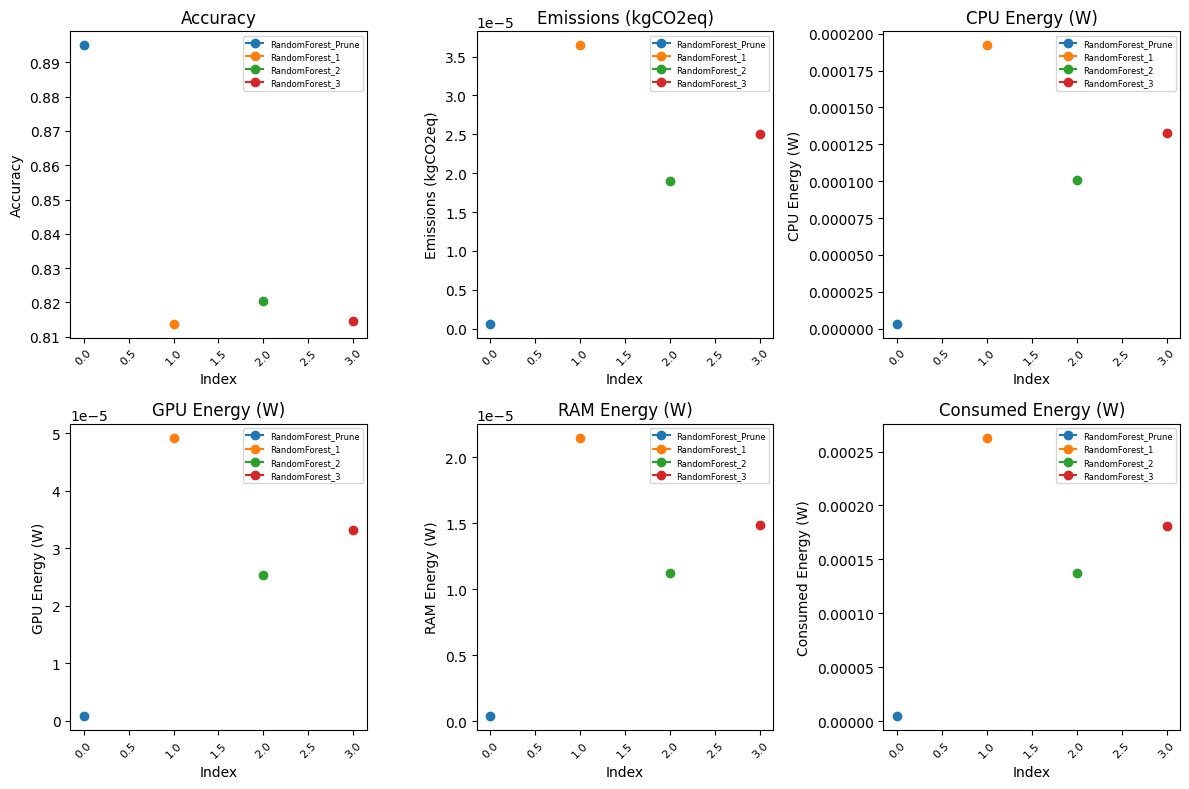

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the two CSV files
file1_path = 'RandomForest_Optimized_results.csv'
file2_path = 'RandomForest_results.csv'

# Load both files into DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Combine the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Columns to plot
numeric_columns = ['Accuracy', 'Emissions (kgCO2eq)', 'CPU Energy (W)',
                   'GPU Energy (W)', 'RAM Energy (W)', 'Consumed Energy (W)']

# Plot each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    for model in combined_df['Model'].unique():
        subset = combined_df[combined_df['Model'] == model]
        plt.plot(subset.index, subset[column], marker='o', label=model)
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(loc='upper right', fontsize=6)
    plt.tight_layout()

# Show the plots
plt.show()
